# Task

This data set is a original version of the Killed or Seriously Injured (KSI) traffic accident reports from the City of Toronto Police Open Data portal.

It contains information for all traffic accidents reported between 2007 and 2017.

The task here is to figure out the best Classification algorithm to predict whether an accident will cause-
1. Fatal
2. Non-Fatal injury 
3. Damage to Property

based on the features in the given data.

### Dataset and Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_orig= pd.read_csv('KSI.csv')

In [3]:
data_orig.head()

,X,Y,Index_,ACCNUM,YEAR,DATE,TIME,Hour,STREET1,STREET2,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Division,Ward_Name,Ward_ID,Hood_ID,Hood_Name,FID
0,-79.383490,43.651545,6666068,1249781,2011,2011-08-04T04:00:00.000Z,2318,23,QUEEN ST W,YORK ST,...,,,,,D52,Toronto Centre-Rosedale (27),27,76,Bay Street Corridor (76),12001
1,-79.300490,43.780445,7542240,1311542,2012,2012-08-19T04:00:00.000Z,2318,23,SHEPPARD AVE E,AMETHYST RD,...,Yes,,,,D42,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118),12002
2,-79.328266,43.682342,80496257,5002235651,2015,2015-12-30T05:00:00.000Z,2339,23,DANFORTH AVE,GILLARD AVE,...,Yes,,,,D55,Toronto-Danforth (30),30,65,Greenwood-Coxwell (65),12003
3,-79.300490,43.780445,7542241,1311542,2012,2012-08-19T04:00:00.000Z,2318,23,SHEPPARD AVE E,AMETHYST RD,...,Yes,,,,D42,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118),12004
4,-79.300490,43.780445,7542242,1311542,2012,2012-08-19T04:00:00.000Z,2318,23,SHEPPARD AVE E,AMETHYST RD,...,Yes,,,,D42,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118),12005


In [4]:
data_orig.info

<bound method DataFrame.info of                X          Y    Index_      ACCNUM  YEAR  \
0     -79.383490  43.651545   6666068     1249781  2011   
1     -79.300490  43.780445   7542240     1311542  2012   
2     -79.328266  43.682342  80496257  5002235651  2015   
3     -79.300490  43.780445   7542241     1311542  2012   
4     -79.300490  43.780445   7542242     1311542  2012   
...          ...        ...       ...         ...   ...   
12552 -79.367590  43.663245   7408709     1291534  2012   
12553 -79.367590  43.663245   7408710     1291534  2012   
12554 -79.367590  43.663245   7408711     1291534  2012   
12555 -79.363430  43.645874  80545822  6001157650  2016   
12556 -79.363430  43.645874  80545838  6001157650  2016   

                           DATE  TIME  Hour         STREET1         STREET2  \
0      2011-08-04T04:00:00.000Z  2318    23      QUEEN ST W         YORK ST   
1      2012-08-19T04:00:00.000Z  2318    23  SHEPPARD AVE E     AMETHYST RD   
2      2015-12-30T05:0

The dataset has 57 columns (features) and 12557 rows (incidents). Firstly, I will manually remove the columns which will clearly not affect the outcome of a traffic accident.

#### orginal column list

In [5]:
data_orig.columns

Index(['X', 'Y', 'Index_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'Hour', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'District', 'LATITUDE', 'LONGITUDE',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'Division', 'Ward_Name', 'Ward_ID', 'Hood_ID',
       'Hood_Name', 'FID'],
      dtype='object')

#### columns after manual removal

In [6]:
data= pd.read_csv('KSI_clean.csv')

In [7]:
data.head()

,YEAR,DATE,ROAD_CLASS,District,LATITUDE,LONGITUDE,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,...,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Ward_Name,Ward_ID,Hood_ID,Hood_Name
0,2011,04-08-2011 09:30,Major Arterial,Toronto East York,43.651545,-79.383490,No,Clear,Natural,Dry,...,,,,,,,Toronto Centre-Rosedale (27),27,76,Bay Street Corridor (76)
1,2012,19-08-2012 09:30,Major Arterial,Scarborough,43.780445,-79.300490,No,Clear,Artificial,Dry,...,Yes,Yes,Yes,,,,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118)
2,2015,30-12-2015 10:30,Major Arterial,Toronto East York,43.682342,-79.328266,No,Clear,Artificial,Dry,...,,,Yes,,,,Toronto-Danforth (30),30,65,Greenwood-Coxwell (65)
3,2012,19-08-2012 09:30,Major Arterial,Scarborough,43.780445,-79.300490,No,Clear,Artificial,Dry,...,Yes,Yes,Yes,,,,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118)
4,2012,19-08-2012 09:30,Major Arterial,Scarborough,43.780445,-79.300490,No,Clear,Artificial,Dry,...,Yes,Yes,Yes,,,,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118)


In [8]:
data.info

<bound method DataFrame.info of        YEAR              DATE      ROAD_CLASS           District   LATITUDE  \
0      2011  04-08-2011 09:30  Major Arterial  Toronto East York  43.651545   
1      2012  19-08-2012 09:30  Major Arterial        Scarborough  43.780445   
2      2015  30-12-2015 10:30  Major Arterial  Toronto East York  43.682342   
3      2012  19-08-2012 09:30  Major Arterial        Scarborough  43.780445   
4      2012  19-08-2012 09:30  Major Arterial        Scarborough  43.780445   
...     ...               ...             ...                ...        ...   
12552  2012  02-03-2012 10:30  Minor Arterial  Toronto East York  43.663245   
12553  2012  02-03-2012 10:30  Minor Arterial  Toronto East York  43.663245   
12554  2012  02-03-2012 10:30  Minor Arterial  Toronto East York  43.663245   
12555  2016  02-07-2016 09:30  Minor Arterial  Toronto East York  43.645874   
12556  2016  02-07-2016 09:30  Minor Arterial  Toronto East York  43.645874   

       LONGITUDE TR

Data in certain columns such as VISIBILTY, TRAFFCTL, LIGHT, RDSFCOND was simplified:

1. TRAFFCTL was simplified to Yes/No rather than specific control names.
2. Classes in VISIBILTY were merged, ex. drifiting snow and snow were merged to class snow.
3. LIGHT was simplified to Natural and Artificial
4. Classes in RDSFCOND were merged, ex. spilled liquid and wet were merged to class wet

## Preprocessing

#### Handling missing values

In [9]:
data.RDSFCOND.fillna(method='ffill', inplace= True)
data.VISIBILITY.fillna(method='ffill', inplace= True)
data.District.fillna(method='ffill',inplace= True)
data.fillna({
    'SPEEDING':'No',
    'AG_DRIV':'No',
    'REDLIGHT':'No',
    'ALCOHOL':'No',
    'DISABILITY':'No',
    'PEDESTRIAN':'No', 
    'CYCLIST':'No', 
    'AUTOMOBILE':'No',
    'MOTORCYCLE':'No', 
    'TRUCK':'No', 
    'TRSN_CITY_VEH':'No', 
    'EMERG_VEH':'No', 
    'PASSENGER':'No'
},inplace= True)

#### Handling dates and time

In [10]:
data.DATE= pd.to_datetime(data.DATE, yearfirst= False, dayfirst= True)
data['DAY_OF_WEEK']= pd.to_datetime(data['DATE']).dt.dayofweek
data['TIME']= pd.to_datetime(data['DATE']).dt.time
data['MONTH']= pd.to_datetime(data['DATE']).dt.month
data['DAY']= pd.to_datetime(data['DATE']).dt.day
data['HOUR']= pd.to_datetime(data['DATE']).dt.hour
data['MINUTES']= pd.to_datetime(data['DATE']).dt.minute
#removing DATE and TIME as they are in datetime format which is not an acceptable format for 
#further processing
data.drop(columns=['DATE','TIME'])

,YEAR,ROAD_CLASS,District,LATITUDE,LONGITUDE,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,...,DISABILITY,Ward_Name,Ward_ID,Hood_ID,Hood_Name,DAY_OF_WEEK,MONTH,DAY,HOUR,MINUTES
0,2011,Major Arterial,Toronto East York,43.651545,-79.383490,No,Clear,Natural,Dry,Non-Fatal Injury,...,,Toronto Centre-Rosedale (27),27,76,Bay Street Corridor (76),3,8,4,9,30
1,2012,Major Arterial,Scarborough,43.780445,-79.300490,No,Clear,Artificial,Dry,Non-Fatal Injury,...,,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118),6,8,19,9,30
2,2015,Major Arterial,Toronto East York,43.682342,-79.328266,No,Clear,Artificial,Dry,Fatal,...,,Toronto-Danforth (30),30,65,Greenwood-Coxwell (65),2,12,30,10,30
3,2012,Major Arterial,Scarborough,43.780445,-79.300490,No,Clear,Artificial,Dry,Non-Fatal Injury,...,,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118),6,8,19,9,30
4,2012,Major Arterial,Scarborough,43.780445,-79.300490,No,Clear,Artificial,Dry,Non-Fatal Injury,...,,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118),6,8,19,9,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,2012,Minor Arterial,Toronto East York,43.663245,-79.367590,No,Clear,Natural,Dry,Non-Fatal Injury,...,,Toronto Centre-Rosedale (28),28,73,Moss Park (73),4,3,2,10,30
12553,2012,Minor Arterial,Toronto East York,43.663245,-79.367590,No,Clear,Natural,Dry,Non-Fatal Injury,...,,Toronto Centre-Rosedale (28),28,73,Moss Park (73),4,3,2,10,30
12554,2012,Minor Arterial,Toronto East York,43.663245,-79.367590,No,Clear,Natural,Dry,Non-Fatal Injury,...,,Toronto Centre-Rosedale (28),28,73,Moss Park (73),4,3,2,10,30
12555,2016,Minor Arterial,Toronto East York,43.645874,-79.363430,No,Clear,Natural,Dry,Fatal,...,,Toronto Centre-Rosedale (28),28,77,Waterfront Communities-The Island (77),5,7,2,9,30


#### Rearranging columns

In [11]:
col_order= ['YEAR','DAY_OF_WEEK', 'MONTH','DAY', 'HOUR', 'MINUTES','LATITUDE', 'LONGITUDE',
            'ROAD_CLASS','VISIBILITY','RDSFCOND','INVAGE','INJURY','TRAFFCTL','LIGHT',
            'District','INITDIR','PEDESTRIAN','CYCLIST', 'AUTOMOBILE','MOTORCYCLE', 'TRUCK', 
            'TRSN_CITY_VEH','EMERG_VEH', 'PASSENGER','SPEEDING', 'AG_DRIV', 'REDLIGHT',
            'ALCOHOL', 'DISABILITY','Ward_ID','Hood_ID','ACCLASS']
data= data.reindex(columns= col_order)

#### Creating features (X) and dependent variable (y)

In [12]:
X= data.iloc[:,:-1]
y= data.iloc[:,-1].values

In [13]:
X

,YEAR,DAY_OF_WEEK,MONTH,DAY,HOUR,MINUTES,LATITUDE,LONGITUDE,ROAD_CLASS,VISIBILITY,...,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Ward_ID,Hood_ID
0,2011,3,8,4,9,30,43.651545,-79.383490,Major Arterial,Clear,...,Yes,,,,,,,,27,76
1,2012,6,8,19,9,30,43.780445,-79.300490,Major Arterial,Clear,...,,,Yes,Yes,Yes,,,,40,118
2,2015,2,12,30,10,30,43.682342,-79.328266,Major Arterial,Clear,...,,,,,Yes,,,,30,65
3,2012,6,8,19,9,30,43.780445,-79.300490,Major Arterial,Clear,...,,,Yes,Yes,Yes,,,,40,118
4,2012,6,8,19,9,30,43.780445,-79.300490,Major Arterial,Clear,...,,,Yes,Yes,Yes,,,,40,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,2012,4,3,2,10,30,43.663245,-79.367590,Minor Arterial,Clear,...,,,,Yes,Yes,,,,28,73
12553,2012,4,3,2,10,30,43.663245,-79.367590,Minor Arterial,Clear,...,,,,Yes,Yes,,,,28,73
12554,2012,4,3,2,10,30,43.663245,-79.367590,Minor Arterial,Clear,...,,,,Yes,Yes,,,,28,73
12555,2016,5,7,2,9,30,43.645874,-79.363430,Minor Arterial,Clear,...,,,Yes,Yes,Yes,,,,28,77


#### Encoding X and y

--> features that are Ordinal, meaning their order has an affect on the severity of the crash, were encoded using the OrdinalEncoder. 
Example: the severity of an injury in the INJURY column has a direct effect on the Fatality of the crash.

--> features that are Non-Ordinal, meaning their order has no affect on the outcome, were encoded with OneHotEncoder.
Example: the direction of travel (North,Sounth,East,West) has no direct affect on the outcome of the crash.

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [15]:
preprocess= make_column_transformer(
                (OrdinalEncoder(),['ROAD_CLASS','VISIBILITY','RDSFCOND','INVAGE','INJURY',
                                  'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE','MOTORCYCLE', 'TRUCK', 
                                   'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER','SPEEDING', 
                                   'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']),
                (OneHotEncoder(),['TRAFFCTL','LIGHT','District','INITDIR']),
                remainder='passthrough')
X= pd.DataFrame(preprocess.fit_transform(X))

In [16]:
le= LabelEncoder()
y= le.fit_transform(y)

In [17]:
X

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,5.0,1.0,1.0,10.0,4.0,1.0,0.0,0.0,0.0,0.0,...,2011.0,3.0,8.0,4.0,9.0,30.0,43.651545,-79.383490,27.0,76.0
1,5.0,1.0,1.0,4.0,2.0,1.0,0.0,1.0,0.0,0.0,...,2012.0,6.0,8.0,19.0,9.0,30.0,43.780445,-79.300490,40.0,118.0
2,5.0,1.0,1.0,12.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2015.0,2.0,12.0,30.0,10.0,30.0,43.682342,-79.328266,30.0,65.0
3,5.0,1.0,1.0,20.0,5.0,1.0,0.0,1.0,0.0,0.0,...,2012.0,6.0,8.0,19.0,9.0,30.0,43.780445,-79.300490,40.0,118.0
4,5.0,1.0,1.0,12.0,4.0,1.0,0.0,1.0,0.0,0.0,...,2012.0,6.0,8.0,19.0,9.0,30.0,43.780445,-79.300490,40.0,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,7.0,1.0,1.0,8.0,1.0,1.0,0.0,0.0,1.0,0.0,...,2012.0,4.0,3.0,2.0,10.0,30.0,43.663245,-79.367590,28.0,73.0
12553,7.0,1.0,1.0,20.0,4.0,1.0,0.0,0.0,1.0,0.0,...,2012.0,4.0,3.0,2.0,10.0,30.0,43.663245,-79.367590,28.0,73.0
12554,7.0,1.0,1.0,5.0,2.0,1.0,0.0,0.0,1.0,0.0,...,2012.0,4.0,3.0,2.0,10.0,30.0,43.663245,-79.367590,28.0,73.0
12555,7.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2016.0,5.0,7.0,2.0,9.0,30.0,43.645874,-79.363430,28.0,77.0


In [18]:
y

array([1, 1, 0, ..., 1, 0, 0])

#### Splitting the data into training and test sets

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.25)

#### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

## Training on different classification models

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

class_ls= LogisticRegression(random_state= 0, max_iter= 500)
class_ls.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=0)

#### Prediction on testing set

In [22]:
y_pred_lr= class_ls.predict(X_test)

In [23]:
cm_lr= confusion_matrix(y_test,y_pred_lr) #confusion matrix
lr_acc= accuracy_score(y_test,y_pred_lr) #accuracy score
print(cm_lr), print(lr_acc)

[[  17  421    0]
 [   8 2691    0]
 [   0    2    1]]
0.8627388535031847


(None, None)

### Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

class_nb= GaussianNB()
class_nb.fit(X_train,y_train)

GaussianNB()

#### Predicting on testing set

In [25]:
y_pred_nb= class_nb.predict(X_test)

In [26]:
cm_nb= confusion_matrix(y_test,y_pred_nb) #confusion matrix
nb_acc= accuracy_score(y_test,y_pred_nb) #accuracy score
print(cm_nb), print(nb_acc)

[[ 404    8   26]
 [2174  224  301]
 [   2    0    1]]
0.20031847133757963


(None, None)

### SVM

In [27]:
from sklearn.svm import SVC

class_svc= SVC(kernel='rbf')
class_svc.fit(X_train,y_train)

SVC()

#### Predicting on testing set

In [28]:
y_pred_svc= class_svc.predict(X_test)

In [29]:
cm_svc= confusion_matrix(y_test,y_pred_svc) #confusion matrix
svc_acc= accuracy_score(y_test,y_pred_svc) #accuracy score
print(cm_svc), print(svc_acc)

[[  41  397    0]
 [   1 2698    0]
 [   0    2    1]]
0.8726114649681529


(None, None)

### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

class_dt= DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
class_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#### Predicting on testing set

In [31]:
y_pred_dt= class_dt.predict(X_test)

In [32]:
cm_dt= confusion_matrix(y_test,y_pred_dt) #confusion matrix
dt_acc= accuracy_score(y_test,y_pred_dt) #accuracy score
print(cm_dt), print(dt_acc)

[[ 329  109    0]
 [ 108 2589    2]
 [   0    2    1]]
0.9296178343949044


(None, None)

### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

class_rf= RandomForestClassifier(n_estimators= 100, criterion= 'entropy', random_state= 0)
class_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

#### Predicting on testing set

In [34]:
y_pred_rf= class_rf.predict(X_test)

In [35]:
cm_rf= confusion_matrix(y_test,y_pred_rf) #confusion matrix
rf_acc= accuracy_score(y_test,y_pred_rf) #accuracy score
print(cm_rf), print(rf_acc)

[[ 276  162    0]
 [   0 2699    0]
 [   0    2    1]]
0.9477707006369427


(None, None)

### K-NN  

In [36]:
from sklearn.neighbors import KNeighborsClassifier

class_knn= KNeighborsClassifier(n_neighbors= 5,metric= 'minkowski',p= 2) #default param values,
class_knn.fit(X_train,y_train)                                           #included for clarity.

KNeighborsClassifier()

#### Predicting on testing set

In [37]:
y_pred_knn= class_knn.predict(X_test)

In [38]:
cm_knn= confusion_matrix(y_test,y_pred_knn) #confusion matrix
knn_acc= accuracy_score(y_test,y_pred_knn) #accuracy score
print(cm_knn), print(knn_acc)

[[ 127  311    0]
 [  48 2651    0]
 [   0    2    1]]
0.8850318471337579


(None, None)

## XGBoost

In [39]:
from xgboost import XGBClassifier

class_xgb= XGBClassifier()
class_xgb.fit(X_train,y_train)

y_pred_xgb= class_xgb.predict(X_test)

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
xgb_acc= accuracy_score(y_test, y_pred_xgb)
print(cm_xgb), print(xgb_acc)

[[ 301  137    0]
 [  13 2686    0]
 [   0    2    1]]
0.9515923566878981


(None, None)

## CatBoost

In [41]:
from catboost import CatBoostClassifier

class_cb= CatBoostClassifier()
class_cb.fit(X_train, y_train)

y_pred_cb = class_cb.predict(X_test)

cm_cb = confusion_matrix(y_test, y_pred_cb)
cb_acc= accuracy_score(y_test, y_pred_cb)
print(cm_cb), print(cb_acc)

Learning rate set to 0.088714
0:	learn: 0.9723326	total: 11.7ms	remaining: 11.7s
1:	learn: 0.8749334	total: 20.8ms	remaining: 10.4s
2:	learn: 0.7960193	total: 28.3ms	remaining: 9.39s
3:	learn: 0.7316645	total: 35.2ms	remaining: 8.77s
4:	learn: 0.6773417	total: 42ms	remaining: 8.36s
5:	learn: 0.6311010	total: 48.8ms	remaining: 8.09s
6:	learn: 0.5914129	total: 56ms	remaining: 7.94s
7:	learn: 0.5562028	total: 62.8ms	remaining: 7.79s
8:	learn: 0.5253848	total: 70.2ms	remaining: 7.72s
9:	learn: 0.4984357	total: 77.4ms	remaining: 7.67s
10:	learn: 0.4744648	total: 84.5ms	remaining: 7.59s
11:	learn: 0.4548264	total: 92.5ms	remaining: 7.61s
12:	learn: 0.4357831	total: 99.5ms	remaining: 7.55s
13:	learn: 0.4193900	total: 108ms	remaining: 7.59s
14:	learn: 0.4048801	total: 115ms	remaining: 7.53s
15:	learn: 0.3920713	total: 122ms	remaining: 7.53s
16:	learn: 0.3799918	total: 129ms	remaining: 7.48s
17:	learn: 0.3690076	total: 137ms	remaining: 7.48s
18:	learn: 0.3601588	total: 141ms	remaining: 7.29s
19

177:	learn: 0.1791804	total: 1.42s	remaining: 6.57s
178:	learn: 0.1788183	total: 1.43s	remaining: 6.56s
179:	learn: 0.1784362	total: 1.44s	remaining: 6.56s
180:	learn: 0.1782690	total: 1.45s	remaining: 6.55s
181:	learn: 0.1775541	total: 1.46s	remaining: 6.54s
182:	learn: 0.1772671	total: 1.46s	remaining: 6.53s
183:	learn: 0.1769731	total: 1.47s	remaining: 6.53s
184:	learn: 0.1766555	total: 1.48s	remaining: 6.51s
185:	learn: 0.1764359	total: 1.49s	remaining: 6.51s
186:	learn: 0.1760629	total: 1.49s	remaining: 6.5s
187:	learn: 0.1753938	total: 1.5s	remaining: 6.49s
188:	learn: 0.1751270	total: 1.51s	remaining: 6.48s
189:	learn: 0.1743833	total: 1.52s	remaining: 6.47s
190:	learn: 0.1742457	total: 1.52s	remaining: 6.46s
191:	learn: 0.1740617	total: 1.53s	remaining: 6.45s
192:	learn: 0.1737515	total: 1.54s	remaining: 6.43s
193:	learn: 0.1733550	total: 1.55s	remaining: 6.42s
194:	learn: 0.1731138	total: 1.55s	remaining: 6.41s
195:	learn: 0.1728726	total: 1.56s	remaining: 6.4s
196:	learn: 0.1

344:	learn: 0.1332111	total: 2.68s	remaining: 5.08s
345:	learn: 0.1330373	total: 2.69s	remaining: 5.08s
346:	learn: 0.1328701	total: 2.69s	remaining: 5.07s
347:	learn: 0.1327547	total: 2.7s	remaining: 5.06s
348:	learn: 0.1324745	total: 2.71s	remaining: 5.06s
349:	learn: 0.1321534	total: 2.72s	remaining: 5.05s
350:	learn: 0.1318360	total: 2.73s	remaining: 5.04s
351:	learn: 0.1315854	total: 2.74s	remaining: 5.04s
352:	learn: 0.1314305	total: 2.74s	remaining: 5.03s
353:	learn: 0.1312791	total: 2.75s	remaining: 5.02s
354:	learn: 0.1311017	total: 2.76s	remaining: 5.02s
355:	learn: 0.1308581	total: 2.77s	remaining: 5.01s
356:	learn: 0.1307240	total: 2.78s	remaining: 5s
357:	learn: 0.1304130	total: 2.78s	remaining: 4.99s
358:	learn: 0.1302331	total: 2.79s	remaining: 4.99s
359:	learn: 0.1300827	total: 2.8s	remaining: 4.98s
360:	learn: 0.1298757	total: 2.81s	remaining: 4.97s
361:	learn: 0.1297553	total: 2.81s	remaining: 4.96s
362:	learn: 0.1296821	total: 2.82s	remaining: 4.95s
363:	learn: 0.129

518:	learn: 0.1048794	total: 4.11s	remaining: 3.81s
519:	learn: 0.1048019	total: 4.11s	remaining: 3.8s
520:	learn: 0.1046076	total: 4.12s	remaining: 3.79s
521:	learn: 0.1044063	total: 4.13s	remaining: 3.78s
522:	learn: 0.1043264	total: 4.14s	remaining: 3.78s
523:	learn: 0.1041913	total: 4.15s	remaining: 3.77s
524:	learn: 0.1039608	total: 4.16s	remaining: 3.76s
525:	learn: 0.1037621	total: 4.16s	remaining: 3.75s
526:	learn: 0.1036357	total: 4.17s	remaining: 3.74s
527:	learn: 0.1034260	total: 4.18s	remaining: 3.74s
528:	learn: 0.1033423	total: 4.19s	remaining: 3.73s
529:	learn: 0.1032616	total: 4.19s	remaining: 3.72s
530:	learn: 0.1031900	total: 4.2s	remaining: 3.71s
531:	learn: 0.1030635	total: 4.21s	remaining: 3.7s
532:	learn: 0.1029982	total: 4.22s	remaining: 3.7s
533:	learn: 0.1029286	total: 4.23s	remaining: 3.69s
534:	learn: 0.1028424	total: 4.24s	remaining: 3.68s
535:	learn: 0.1025422	total: 4.25s	remaining: 3.67s
536:	learn: 0.1024963	total: 4.25s	remaining: 3.67s
537:	learn: 0.10

687:	learn: 0.0858329	total: 5.54s	remaining: 2.51s
688:	learn: 0.0857623	total: 5.55s	remaining: 2.5s
689:	learn: 0.0856909	total: 5.56s	remaining: 2.5s
690:	learn: 0.0855124	total: 5.57s	remaining: 2.49s
691:	learn: 0.0853940	total: 5.58s	remaining: 2.48s
692:	learn: 0.0853149	total: 5.59s	remaining: 2.48s
693:	learn: 0.0851857	total: 5.6s	remaining: 2.47s
694:	learn: 0.0851335	total: 5.61s	remaining: 2.46s
695:	learn: 0.0850853	total: 5.62s	remaining: 2.45s
696:	learn: 0.0850270	total: 5.62s	remaining: 2.44s
697:	learn: 0.0849033	total: 5.63s	remaining: 2.44s
698:	learn: 0.0848109	total: 5.64s	remaining: 2.43s
699:	learn: 0.0846962	total: 5.65s	remaining: 2.42s
700:	learn: 0.0846268	total: 5.66s	remaining: 2.41s
701:	learn: 0.0845429	total: 5.66s	remaining: 2.4s
702:	learn: 0.0844424	total: 5.67s	remaining: 2.4s
703:	learn: 0.0843694	total: 5.68s	remaining: 2.39s
704:	learn: 0.0843059	total: 5.68s	remaining: 2.38s
705:	learn: 0.0842166	total: 5.69s	remaining: 2.37s
706:	learn: 0.084

866:	learn: 0.0705841	total: 6.97s	remaining: 1.07s
867:	learn: 0.0705169	total: 6.98s	remaining: 1.06s
868:	learn: 0.0704572	total: 6.99s	remaining: 1.05s
869:	learn: 0.0703943	total: 7s	remaining: 1.04s
870:	learn: 0.0703443	total: 7s	remaining: 1.04s
871:	learn: 0.0702497	total: 7.01s	remaining: 1.03s
872:	learn: 0.0701672	total: 7.02s	remaining: 1.02s
873:	learn: 0.0701183	total: 7.03s	remaining: 1.01s
874:	learn: 0.0700700	total: 7.04s	remaining: 1s
875:	learn: 0.0700106	total: 7.04s	remaining: 997ms
876:	learn: 0.0699420	total: 7.05s	remaining: 989ms
877:	learn: 0.0698829	total: 7.06s	remaining: 981ms
878:	learn: 0.0698081	total: 7.07s	remaining: 973ms
879:	learn: 0.0697042	total: 7.08s	remaining: 965ms
880:	learn: 0.0695955	total: 7.08s	remaining: 957ms
881:	learn: 0.0695026	total: 7.09s	remaining: 949ms
882:	learn: 0.0694596	total: 7.1s	remaining: 941ms
883:	learn: 0.0693043	total: 7.11s	remaining: 933ms
884:	learn: 0.0692065	total: 7.12s	remaining: 925ms
885:	learn: 0.0690132	

(None, None)

## Comparing different models 

In [42]:
import matplotlib.pyplot as plt

accuracy_scores= [lr_acc, nb_acc, dt_acc, rf_acc, svc_acc, knn_acc,xgb_acc,cb_acc]
algo= ['Logistic Regression','Naive Bayes','Decision Tree','Random Forest',
       'Support Vector Classification', 'K-Nearest Neighbors','XGBoost','CatBoost']

Text(0.5, 0, 'Accuracy Score')

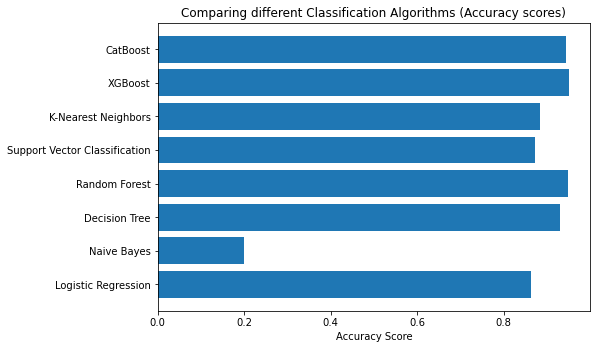

In [43]:
fig= plt.figure()
ax= fig.add_axes([0,0,1,1])
ax.barh(algo,accuracy_scores)
ax.set_title('Comparing different Classification Algorithms (Accuracy scores)')
ax.set_xlabel('Accuracy Score')

## Cross Validation Score

C:\Users\Prashant Desai\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Prashant Desai\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Prashant Desai\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Prashant Desai\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Prashant Desai\anaconda3\lib\site-packages\sklearn\mode

Learning rate set to 0.088239
0:	learn: 0.9727119	total: 30.1ms	remaining: 30.1s
1:	learn: 0.8754967	total: 43.6ms	remaining: 21.7s
2:	learn: 0.7966271	total: 54.1ms	remaining: 18s
3:	learn: 0.7322434	total: 65.3ms	remaining: 16.3s
4:	learn: 0.6776855	total: 71.7ms	remaining: 14.3s
5:	learn: 0.6313146	total: 80.1ms	remaining: 13.3s
6:	learn: 0.5914732	total: 86.5ms	remaining: 12.3s
7:	learn: 0.5562544	total: 94.3ms	remaining: 11.7s
8:	learn: 0.5252653	total: 101ms	remaining: 11.1s
9:	learn: 0.4980659	total: 106ms	remaining: 10.5s
10:	learn: 0.4757108	total: 113ms	remaining: 10.2s
11:	learn: 0.4549315	total: 119ms	remaining: 9.83s
12:	learn: 0.4376193	total: 127ms	remaining: 9.64s
13:	learn: 0.4219602	total: 133ms	remaining: 9.39s
14:	learn: 0.4076098	total: 141ms	remaining: 9.26s
15:	learn: 0.3941626	total: 148ms	remaining: 9.07s
16:	learn: 0.3818188	total: 155ms	remaining: 8.96s
17:	learn: 0.3711740	total: 162ms	remaining: 8.81s
18:	learn: 0.3614695	total: 170ms	remaining: 8.75s
19:	l

173:	learn: 0.1805646	total: 1.42s	remaining: 6.76s
174:	learn: 0.1801431	total: 1.43s	remaining: 6.76s
175:	learn: 0.1796568	total: 1.45s	remaining: 6.77s
176:	learn: 0.1793453	total: 1.45s	remaining: 6.76s
177:	learn: 0.1787916	total: 1.46s	remaining: 6.76s
178:	learn: 0.1784645	total: 1.47s	remaining: 6.75s
179:	learn: 0.1782195	total: 1.48s	remaining: 6.74s
180:	learn: 0.1777335	total: 1.49s	remaining: 6.74s
181:	learn: 0.1774739	total: 1.5s	remaining: 6.72s
182:	learn: 0.1769604	total: 1.5s	remaining: 6.72s
183:	learn: 0.1765269	total: 1.51s	remaining: 6.71s
184:	learn: 0.1761901	total: 1.52s	remaining: 6.71s
185:	learn: 0.1757295	total: 1.53s	remaining: 6.7s
186:	learn: 0.1753643	total: 1.54s	remaining: 6.69s
187:	learn: 0.1751028	total: 1.55s	remaining: 6.68s
188:	learn: 0.1748774	total: 1.55s	remaining: 6.68s
189:	learn: 0.1743832	total: 1.56s	remaining: 6.67s
190:	learn: 0.1738235	total: 1.57s	remaining: 6.66s
191:	learn: 0.1735183	total: 1.58s	remaining: 6.66s
192:	learn: 0.1

348:	learn: 0.1333835	total: 2.85s	remaining: 5.33s
349:	learn: 0.1331232	total: 2.86s	remaining: 5.32s
350:	learn: 0.1328176	total: 2.88s	remaining: 5.32s
351:	learn: 0.1326714	total: 2.88s	remaining: 5.31s
352:	learn: 0.1324880	total: 2.89s	remaining: 5.3s
353:	learn: 0.1321802	total: 2.9s	remaining: 5.29s
354:	learn: 0.1319794	total: 2.91s	remaining: 5.28s
355:	learn: 0.1318513	total: 2.91s	remaining: 5.27s
356:	learn: 0.1315847	total: 2.92s	remaining: 5.26s
357:	learn: 0.1315059	total: 2.93s	remaining: 5.25s
358:	learn: 0.1312422	total: 2.94s	remaining: 5.24s
359:	learn: 0.1309382	total: 2.94s	remaining: 5.24s
360:	learn: 0.1307025	total: 2.95s	remaining: 5.23s
361:	learn: 0.1305850	total: 2.96s	remaining: 5.22s
362:	learn: 0.1303846	total: 2.97s	remaining: 5.21s
363:	learn: 0.1301889	total: 2.97s	remaining: 5.2s
364:	learn: 0.1300950	total: 2.98s	remaining: 5.19s
365:	learn: 0.1298882	total: 2.99s	remaining: 5.18s
366:	learn: 0.1296508	total: 3s	remaining: 5.17s
367:	learn: 0.1292

525:	learn: 0.1029114	total: 4.28s	remaining: 3.86s
526:	learn: 0.1027957	total: 4.29s	remaining: 3.85s
527:	learn: 0.1027078	total: 4.3s	remaining: 3.84s
528:	learn: 0.1024470	total: 4.31s	remaining: 3.83s
529:	learn: 0.1022953	total: 4.32s	remaining: 3.83s
530:	learn: 0.1020716	total: 4.32s	remaining: 3.82s
531:	learn: 0.1018899	total: 4.33s	remaining: 3.81s
532:	learn: 0.1018506	total: 4.34s	remaining: 3.8s
533:	learn: 0.1018167	total: 4.35s	remaining: 3.79s
534:	learn: 0.1017033	total: 4.35s	remaining: 3.78s
535:	learn: 0.1016311	total: 4.36s	remaining: 3.78s
536:	learn: 0.1014697	total: 4.37s	remaining: 3.77s
537:	learn: 0.1012857	total: 4.38s	remaining: 3.76s
538:	learn: 0.1011057	total: 4.38s	remaining: 3.75s
539:	learn: 0.1009904	total: 4.39s	remaining: 3.74s
540:	learn: 0.1009208	total: 4.4s	remaining: 3.73s
541:	learn: 0.1007559	total: 4.41s	remaining: 3.72s
542:	learn: 0.1005051	total: 4.42s	remaining: 3.72s
543:	learn: 0.1003262	total: 4.42s	remaining: 3.71s
544:	learn: 0.1

693:	learn: 0.0838913	total: 5.71s	remaining: 2.52s
694:	learn: 0.0837943	total: 5.72s	remaining: 2.51s
695:	learn: 0.0837069	total: 5.73s	remaining: 2.5s
696:	learn: 0.0836502	total: 5.74s	remaining: 2.49s
697:	learn: 0.0835693	total: 5.75s	remaining: 2.49s
698:	learn: 0.0834819	total: 5.76s	remaining: 2.48s
699:	learn: 0.0833863	total: 5.76s	remaining: 2.47s
700:	learn: 0.0833091	total: 5.77s	remaining: 2.46s
701:	learn: 0.0832438	total: 5.78s	remaining: 2.45s
702:	learn: 0.0831913	total: 5.79s	remaining: 2.45s
703:	learn: 0.0831128	total: 5.8s	remaining: 2.44s
704:	learn: 0.0830081	total: 5.8s	remaining: 2.43s
705:	learn: 0.0828659	total: 5.81s	remaining: 2.42s
706:	learn: 0.0827758	total: 5.82s	remaining: 2.41s
707:	learn: 0.0826972	total: 5.83s	remaining: 2.4s
708:	learn: 0.0826309	total: 5.84s	remaining: 2.4s
709:	learn: 0.0825074	total: 5.84s	remaining: 2.39s
710:	learn: 0.0824458	total: 5.85s	remaining: 2.38s
711:	learn: 0.0823619	total: 5.86s	remaining: 2.37s
712:	learn: 0.082

869:	learn: 0.0691870	total: 7.31s	remaining: 1.09s
870:	learn: 0.0691174	total: 7.32s	remaining: 1.08s
871:	learn: 0.0690162	total: 7.33s	remaining: 1.07s
872:	learn: 0.0688629	total: 7.34s	remaining: 1.07s
873:	learn: 0.0688257	total: 7.35s	remaining: 1.06s
874:	learn: 0.0687226	total: 7.35s	remaining: 1.05s
875:	learn: 0.0686608	total: 7.36s	remaining: 1.04s
876:	learn: 0.0685613	total: 7.37s	remaining: 1.03s
877:	learn: 0.0684788	total: 7.38s	remaining: 1.02s
878:	learn: 0.0683642	total: 7.39s	remaining: 1.02s
879:	learn: 0.0682968	total: 7.4s	remaining: 1.01s
880:	learn: 0.0682019	total: 7.4s	remaining: 1s
881:	learn: 0.0681403	total: 7.41s	remaining: 992ms
882:	learn: 0.0680352	total: 7.42s	remaining: 983ms
883:	learn: 0.0678703	total: 7.43s	remaining: 975ms
884:	learn: 0.0678095	total: 7.43s	remaining: 966ms
885:	learn: 0.0677265	total: 7.44s	remaining: 958ms
886:	learn: 0.0676819	total: 7.45s	remaining: 949ms
887:	learn: 0.0675926	total: 7.46s	remaining: 941ms
888:	learn: 0.067

40:	learn: 0.2685317	total: 360ms	remaining: 8.42s
41:	learn: 0.2667478	total: 369ms	remaining: 8.42s
42:	learn: 0.2650234	total: 378ms	remaining: 8.42s
43:	learn: 0.2626780	total: 387ms	remaining: 8.41s
44:	learn: 0.2608330	total: 395ms	remaining: 8.39s
45:	learn: 0.2593781	total: 405ms	remaining: 8.39s
46:	learn: 0.2582297	total: 414ms	remaining: 8.39s
47:	learn: 0.2565664	total: 428ms	remaining: 8.49s
48:	learn: 0.2549188	total: 442ms	remaining: 8.58s
49:	learn: 0.2535025	total: 456ms	remaining: 8.67s
50:	learn: 0.2523829	total: 473ms	remaining: 8.8s
51:	learn: 0.2514573	total: 496ms	remaining: 9.04s
52:	learn: 0.2505933	total: 509ms	remaining: 9.09s
53:	learn: 0.2497109	total: 519ms	remaining: 9.09s
54:	learn: 0.2479896	total: 528ms	remaining: 9.07s
55:	learn: 0.2467445	total: 540ms	remaining: 9.1s
56:	learn: 0.2460745	total: 550ms	remaining: 9.1s
57:	learn: 0.2447504	total: 565ms	remaining: 9.18s
58:	learn: 0.2439135	total: 574ms	remaining: 9.15s
59:	learn: 0.2428196	total: 584ms	

209:	learn: 0.1670874	total: 2.15s	remaining: 8.1s
210:	learn: 0.1668759	total: 2.16s	remaining: 8.08s
211:	learn: 0.1664405	total: 2.17s	remaining: 8.07s
212:	learn: 0.1662908	total: 2.18s	remaining: 8.06s
213:	learn: 0.1659194	total: 2.19s	remaining: 8.04s
214:	learn: 0.1657053	total: 2.2s	remaining: 8.03s
215:	learn: 0.1653006	total: 2.21s	remaining: 8.01s
216:	learn: 0.1650028	total: 2.21s	remaining: 7.99s
217:	learn: 0.1647463	total: 2.22s	remaining: 7.97s
218:	learn: 0.1645320	total: 2.23s	remaining: 7.95s
219:	learn: 0.1642623	total: 2.23s	remaining: 7.93s
220:	learn: 0.1639953	total: 2.24s	remaining: 7.91s
221:	learn: 0.1639446	total: 2.25s	remaining: 7.89s
222:	learn: 0.1635933	total: 2.26s	remaining: 7.87s
223:	learn: 0.1631082	total: 2.27s	remaining: 7.85s
224:	learn: 0.1629731	total: 2.27s	remaining: 7.83s
225:	learn: 0.1627754	total: 2.28s	remaining: 7.81s
226:	learn: 0.1625483	total: 2.29s	remaining: 7.8s
227:	learn: 0.1622020	total: 2.3s	remaining: 7.78s
228:	learn: 0.16

389:	learn: 0.1256646	total: 3.58s	remaining: 5.6s
390:	learn: 0.1254686	total: 3.59s	remaining: 5.59s
391:	learn: 0.1252922	total: 3.6s	remaining: 5.58s
392:	learn: 0.1251483	total: 3.61s	remaining: 5.57s
393:	learn: 0.1250275	total: 3.62s	remaining: 5.56s
394:	learn: 0.1248944	total: 3.63s	remaining: 5.55s
395:	learn: 0.1246596	total: 3.63s	remaining: 5.54s
396:	learn: 0.1245063	total: 3.64s	remaining: 5.53s
397:	learn: 0.1243456	total: 3.65s	remaining: 5.52s
398:	learn: 0.1241404	total: 3.66s	remaining: 5.51s
399:	learn: 0.1239959	total: 3.66s	remaining: 5.5s
400:	learn: 0.1239007	total: 3.67s	remaining: 5.48s
401:	learn: 0.1236527	total: 3.68s	remaining: 5.47s
402:	learn: 0.1233286	total: 3.69s	remaining: 5.46s
403:	learn: 0.1231346	total: 3.7s	remaining: 5.46s
404:	learn: 0.1228680	total: 3.71s	remaining: 5.44s
405:	learn: 0.1227295	total: 3.71s	remaining: 5.43s
406:	learn: 0.1225350	total: 3.72s	remaining: 5.42s
407:	learn: 0.1224276	total: 3.73s	remaining: 5.41s
408:	learn: 0.12

567:	learn: 0.0981058	total: 5.01s	remaining: 3.81s
568:	learn: 0.0978172	total: 5.02s	remaining: 3.8s
569:	learn: 0.0976928	total: 5.03s	remaining: 3.79s
570:	learn: 0.0975543	total: 5.04s	remaining: 3.78s
571:	learn: 0.0974415	total: 5.04s	remaining: 3.77s
572:	learn: 0.0972838	total: 5.05s	remaining: 3.77s
573:	learn: 0.0971567	total: 5.06s	remaining: 3.75s
574:	learn: 0.0970478	total: 5.07s	remaining: 3.75s
575:	learn: 0.0969258	total: 5.08s	remaining: 3.73s
576:	learn: 0.0967453	total: 5.08s	remaining: 3.73s
577:	learn: 0.0966668	total: 5.09s	remaining: 3.72s
578:	learn: 0.0965328	total: 5.1s	remaining: 3.71s
579:	learn: 0.0964752	total: 5.11s	remaining: 3.7s
580:	learn: 0.0963179	total: 5.11s	remaining: 3.69s
581:	learn: 0.0962047	total: 5.12s	remaining: 3.68s
582:	learn: 0.0960778	total: 5.13s	remaining: 3.67s
583:	learn: 0.0959521	total: 5.14s	remaining: 3.66s
584:	learn: 0.0958678	total: 5.14s	remaining: 3.65s
585:	learn: 0.0957675	total: 5.15s	remaining: 3.64s
586:	learn: 0.0

738:	learn: 0.0798536	total: 6.44s	remaining: 2.27s
739:	learn: 0.0797913	total: 6.45s	remaining: 2.27s
740:	learn: 0.0796393	total: 6.46s	remaining: 2.26s
741:	learn: 0.0795492	total: 6.46s	remaining: 2.25s
742:	learn: 0.0794670	total: 6.47s	remaining: 2.24s
743:	learn: 0.0794183	total: 6.48s	remaining: 2.23s
744:	learn: 0.0793482	total: 6.49s	remaining: 2.22s
745:	learn: 0.0792599	total: 6.5s	remaining: 2.21s
746:	learn: 0.0791546	total: 6.51s	remaining: 2.2s
747:	learn: 0.0791084	total: 6.51s	remaining: 2.19s
748:	learn: 0.0790030	total: 6.53s	remaining: 2.19s
749:	learn: 0.0789119	total: 6.53s	remaining: 2.18s
750:	learn: 0.0788320	total: 6.54s	remaining: 2.17s
751:	learn: 0.0787456	total: 6.55s	remaining: 2.16s
752:	learn: 0.0786728	total: 6.56s	remaining: 2.15s
753:	learn: 0.0785384	total: 6.57s	remaining: 2.14s
754:	learn: 0.0783860	total: 6.58s	remaining: 2.13s
755:	learn: 0.0783186	total: 6.58s	remaining: 2.13s
756:	learn: 0.0782631	total: 6.59s	remaining: 2.12s
757:	learn: 0.

899:	learn: 0.0667532	total: 7.86s	remaining: 874ms
900:	learn: 0.0667085	total: 7.87s	remaining: 865ms
901:	learn: 0.0666423	total: 7.88s	remaining: 856ms
902:	learn: 0.0665201	total: 7.89s	remaining: 848ms
903:	learn: 0.0664677	total: 7.9s	remaining: 839ms
904:	learn: 0.0664067	total: 7.91s	remaining: 830ms
905:	learn: 0.0663710	total: 7.92s	remaining: 821ms
906:	learn: 0.0662581	total: 7.93s	remaining: 813ms
907:	learn: 0.0661165	total: 7.93s	remaining: 804ms
908:	learn: 0.0660077	total: 7.94s	remaining: 795ms
909:	learn: 0.0659670	total: 7.95s	remaining: 787ms
910:	learn: 0.0658693	total: 7.96s	remaining: 778ms
911:	learn: 0.0658215	total: 7.97s	remaining: 769ms
912:	learn: 0.0657966	total: 7.98s	remaining: 760ms
913:	learn: 0.0657507	total: 7.99s	remaining: 752ms
914:	learn: 0.0656952	total: 7.99s	remaining: 743ms
915:	learn: 0.0656373	total: 8s	remaining: 734ms
916:	learn: 0.0655793	total: 8.01s	remaining: 725ms
917:	learn: 0.0655395	total: 8.02s	remaining: 717ms
918:	learn: 0.06

70:	learn: 0.2350963	total: 542ms	remaining: 7.09s
71:	learn: 0.2339917	total: 553ms	remaining: 7.13s
72:	learn: 0.2330244	total: 562ms	remaining: 7.14s
73:	learn: 0.2321565	total: 571ms	remaining: 7.14s
74:	learn: 0.2310753	total: 579ms	remaining: 7.14s
75:	learn: 0.2304733	total: 589ms	remaining: 7.16s
76:	learn: 0.2297717	total: 598ms	remaining: 7.17s
77:	learn: 0.2292761	total: 606ms	remaining: 7.16s
78:	learn: 0.2286861	total: 616ms	remaining: 7.17s
79:	learn: 0.2281365	total: 623ms	remaining: 7.16s
80:	learn: 0.2273633	total: 632ms	remaining: 7.17s
81:	learn: 0.2266642	total: 640ms	remaining: 7.16s
82:	learn: 0.2262733	total: 649ms	remaining: 7.16s
83:	learn: 0.2253125	total: 656ms	remaining: 7.16s
84:	learn: 0.2246197	total: 665ms	remaining: 7.16s
85:	learn: 0.2240715	total: 674ms	remaining: 7.16s
86:	learn: 0.2232080	total: 684ms	remaining: 7.18s
87:	learn: 0.2227539	total: 696ms	remaining: 7.21s
88:	learn: 0.2219576	total: 709ms	remaining: 7.25s
89:	learn: 0.2213737	total: 719

245:	learn: 0.1585958	total: 1.98s	remaining: 6.06s
246:	learn: 0.1581858	total: 1.98s	remaining: 6.05s
247:	learn: 0.1578366	total: 1.99s	remaining: 6.04s
248:	learn: 0.1574097	total: 2s	remaining: 6.05s
249:	learn: 0.1570814	total: 2.02s	remaining: 6.05s
250:	learn: 0.1565942	total: 2.02s	remaining: 6.04s
251:	learn: 0.1563671	total: 2.03s	remaining: 6.03s
252:	learn: 0.1561894	total: 2.04s	remaining: 6.02s
253:	learn: 0.1559758	total: 2.05s	remaining: 6.01s
254:	learn: 0.1556487	total: 2.06s	remaining: 6s
255:	learn: 0.1553606	total: 2.06s	remaining: 5.99s
256:	learn: 0.1551390	total: 2.07s	remaining: 5.98s
257:	learn: 0.1549436	total: 2.08s	remaining: 5.97s
258:	learn: 0.1547647	total: 2.08s	remaining: 5.96s
259:	learn: 0.1546725	total: 2.09s	remaining: 5.95s
260:	learn: 0.1541433	total: 2.1s	remaining: 5.94s
261:	learn: 0.1537809	total: 2.11s	remaining: 5.93s
262:	learn: 0.1535328	total: 2.11s	remaining: 5.92s
263:	learn: 0.1533730	total: 2.12s	remaining: 5.91s
264:	learn: 0.15315

421:	learn: 0.1209002	total: 3.39s	remaining: 4.65s
422:	learn: 0.1207510	total: 3.4s	remaining: 4.64s
423:	learn: 0.1206421	total: 3.41s	remaining: 4.63s
424:	learn: 0.1204540	total: 3.42s	remaining: 4.63s
425:	learn: 0.1202551	total: 3.43s	remaining: 4.62s
426:	learn: 0.1200775	total: 3.44s	remaining: 4.62s
427:	learn: 0.1199500	total: 3.45s	remaining: 4.61s
428:	learn: 0.1198037	total: 3.45s	remaining: 4.6s
429:	learn: 0.1196558	total: 3.46s	remaining: 4.59s
430:	learn: 0.1195970	total: 3.47s	remaining: 4.58s
431:	learn: 0.1194034	total: 3.48s	remaining: 4.57s
432:	learn: 0.1192215	total: 3.49s	remaining: 4.57s
433:	learn: 0.1188125	total: 3.49s	remaining: 4.56s
434:	learn: 0.1185661	total: 3.5s	remaining: 4.55s
435:	learn: 0.1183899	total: 3.51s	remaining: 4.54s
436:	learn: 0.1182822	total: 3.52s	remaining: 4.53s
437:	learn: 0.1181398	total: 3.52s	remaining: 4.52s
438:	learn: 0.1180027	total: 3.53s	remaining: 4.51s
439:	learn: 0.1176739	total: 3.54s	remaining: 4.51s
440:	learn: 0.1

595:	learn: 0.0960499	total: 4.83s	remaining: 3.27s
596:	learn: 0.0959560	total: 4.84s	remaining: 3.27s
597:	learn: 0.0957695	total: 4.85s	remaining: 3.26s
598:	learn: 0.0956158	total: 4.86s	remaining: 3.25s
599:	learn: 0.0954648	total: 4.87s	remaining: 3.24s
600:	learn: 0.0953160	total: 4.87s	remaining: 3.23s
601:	learn: 0.0952308	total: 4.88s	remaining: 3.23s
602:	learn: 0.0951736	total: 4.89s	remaining: 3.22s
603:	learn: 0.0951158	total: 4.9s	remaining: 3.21s
604:	learn: 0.0949836	total: 4.91s	remaining: 3.21s
605:	learn: 0.0948990	total: 4.92s	remaining: 3.2s
606:	learn: 0.0948467	total: 4.93s	remaining: 3.19s
607:	learn: 0.0947571	total: 4.93s	remaining: 3.18s
608:	learn: 0.0944824	total: 4.94s	remaining: 3.17s
609:	learn: 0.0942999	total: 4.95s	remaining: 3.16s
610:	learn: 0.0942544	total: 4.96s	remaining: 3.16s
611:	learn: 0.0941997	total: 4.96s	remaining: 3.15s
612:	learn: 0.0940239	total: 4.97s	remaining: 3.14s
613:	learn: 0.0939696	total: 4.98s	remaining: 3.13s
614:	learn: 0.

770:	learn: 0.0784204	total: 6.43s	remaining: 1.91s
771:	learn: 0.0783048	total: 6.44s	remaining: 1.9s
772:	learn: 0.0781847	total: 6.46s	remaining: 1.9s
773:	learn: 0.0781044	total: 6.47s	remaining: 1.89s
774:	learn: 0.0779785	total: 6.48s	remaining: 1.88s
775:	learn: 0.0778845	total: 6.49s	remaining: 1.87s
776:	learn: 0.0778157	total: 6.5s	remaining: 1.86s
777:	learn: 0.0777543	total: 6.51s	remaining: 1.86s
778:	learn: 0.0776712	total: 6.52s	remaining: 1.85s
779:	learn: 0.0775744	total: 6.53s	remaining: 1.84s
780:	learn: 0.0775482	total: 6.54s	remaining: 1.83s
781:	learn: 0.0774813	total: 6.55s	remaining: 1.83s
782:	learn: 0.0774025	total: 6.56s	remaining: 1.82s
783:	learn: 0.0773212	total: 6.57s	remaining: 1.81s
784:	learn: 0.0772614	total: 6.58s	remaining: 1.8s
785:	learn: 0.0771292	total: 6.59s	remaining: 1.79s
786:	learn: 0.0769951	total: 6.6s	remaining: 1.79s
787:	learn: 0.0769431	total: 6.61s	remaining: 1.78s
788:	learn: 0.0768219	total: 6.62s	remaining: 1.77s
789:	learn: 0.076

937:	learn: 0.0651145	total: 8.22s	remaining: 544ms
938:	learn: 0.0650220	total: 8.24s	remaining: 535ms
939:	learn: 0.0649854	total: 8.25s	remaining: 526ms
940:	learn: 0.0649466	total: 8.26s	remaining: 518ms
941:	learn: 0.0648931	total: 8.26s	remaining: 509ms
942:	learn: 0.0648258	total: 8.27s	remaining: 500ms
943:	learn: 0.0647405	total: 8.28s	remaining: 491ms
944:	learn: 0.0646895	total: 8.29s	remaining: 482ms
945:	learn: 0.0645580	total: 8.29s	remaining: 474ms
946:	learn: 0.0644957	total: 8.3s	remaining: 465ms
947:	learn: 0.0644598	total: 8.31s	remaining: 456ms
948:	learn: 0.0644074	total: 8.32s	remaining: 447ms
949:	learn: 0.0643800	total: 8.33s	remaining: 438ms
950:	learn: 0.0643428	total: 8.34s	remaining: 430ms
951:	learn: 0.0642720	total: 8.35s	remaining: 421ms
952:	learn: 0.0642192	total: 8.35s	remaining: 412ms
953:	learn: 0.0641681	total: 8.36s	remaining: 403ms
954:	learn: 0.0641379	total: 8.37s	remaining: 395ms
955:	learn: 0.0640677	total: 8.38s	remaining: 386ms
956:	learn: 0

98:	learn: 0.2179554	total: 719ms	remaining: 6.54s
99:	learn: 0.2172428	total: 731ms	remaining: 6.58s
100:	learn: 0.2167425	total: 740ms	remaining: 6.59s
101:	learn: 0.2158669	total: 747ms	remaining: 6.58s
102:	learn: 0.2153088	total: 755ms	remaining: 6.58s
103:	learn: 0.2146871	total: 762ms	remaining: 6.56s
104:	learn: 0.2139568	total: 770ms	remaining: 6.56s
105:	learn: 0.2132358	total: 777ms	remaining: 6.55s
106:	learn: 0.2130181	total: 784ms	remaining: 6.54s
107:	learn: 0.2124934	total: 791ms	remaining: 6.54s
108:	learn: 0.2120605	total: 799ms	remaining: 6.53s
109:	learn: 0.2116033	total: 806ms	remaining: 6.52s
110:	learn: 0.2107197	total: 814ms	remaining: 6.52s
111:	learn: 0.2099977	total: 821ms	remaining: 6.51s
112:	learn: 0.2094552	total: 828ms	remaining: 6.5s
113:	learn: 0.2091051	total: 836ms	remaining: 6.5s
114:	learn: 0.2082473	total: 843ms	remaining: 6.49s
115:	learn: 0.2077625	total: 851ms	remaining: 6.49s
116:	learn: 0.2070155	total: 858ms	remaining: 6.48s
117:	learn: 0.20

275:	learn: 0.1497495	total: 2.15s	remaining: 5.63s
276:	learn: 0.1494989	total: 2.16s	remaining: 5.63s
277:	learn: 0.1493092	total: 2.16s	remaining: 5.62s
278:	learn: 0.1490440	total: 2.17s	remaining: 5.61s
279:	learn: 0.1488630	total: 2.18s	remaining: 5.61s
280:	learn: 0.1485323	total: 2.19s	remaining: 5.6s
281:	learn: 0.1481111	total: 2.2s	remaining: 5.6s
282:	learn: 0.1478705	total: 2.21s	remaining: 5.59s
283:	learn: 0.1475743	total: 2.21s	remaining: 5.58s
284:	learn: 0.1473556	total: 2.22s	remaining: 5.58s
285:	learn: 0.1470854	total: 2.23s	remaining: 5.57s
286:	learn: 0.1467093	total: 2.24s	remaining: 5.57s
287:	learn: 0.1465244	total: 2.25s	remaining: 5.56s
288:	learn: 0.1462503	total: 2.26s	remaining: 5.55s
289:	learn: 0.1459023	total: 2.27s	remaining: 5.55s
290:	learn: 0.1456676	total: 2.27s	remaining: 5.54s
291:	learn: 0.1455897	total: 2.28s	remaining: 5.53s
292:	learn: 0.1451555	total: 2.29s	remaining: 5.53s
293:	learn: 0.1448988	total: 2.3s	remaining: 5.52s
294:	learn: 0.14

453:	learn: 0.1138411	total: 3.58s	remaining: 4.3s
454:	learn: 0.1137483	total: 3.58s	remaining: 4.29s
455:	learn: 0.1134940	total: 3.6s	remaining: 4.29s
456:	learn: 0.1134109	total: 3.6s	remaining: 4.28s
457:	learn: 0.1132912	total: 3.61s	remaining: 4.27s
458:	learn: 0.1131900	total: 3.62s	remaining: 4.26s
459:	learn: 0.1129657	total: 3.63s	remaining: 4.26s
460:	learn: 0.1128173	total: 3.63s	remaining: 4.25s
461:	learn: 0.1127261	total: 3.64s	remaining: 4.24s
462:	learn: 0.1126632	total: 3.65s	remaining: 4.23s
463:	learn: 0.1124460	total: 3.66s	remaining: 4.23s
464:	learn: 0.1123833	total: 3.67s	remaining: 4.22s
465:	learn: 0.1122143	total: 3.67s	remaining: 4.21s
466:	learn: 0.1120597	total: 3.68s	remaining: 4.2s
467:	learn: 0.1119359	total: 3.69s	remaining: 4.19s
468:	learn: 0.1118156	total: 3.7s	remaining: 4.18s
469:	learn: 0.1117309	total: 3.7s	remaining: 4.18s
470:	learn: 0.1115179	total: 3.71s	remaining: 4.17s
471:	learn: 0.1113556	total: 3.72s	remaining: 4.16s
472:	learn: 0.1111

629:	learn: 0.0912076	total: 5.04s	remaining: 2.96s
630:	learn: 0.0911091	total: 5.05s	remaining: 2.95s
631:	learn: 0.0910615	total: 5.06s	remaining: 2.94s
632:	learn: 0.0909536	total: 5.07s	remaining: 2.94s
633:	learn: 0.0908535	total: 5.07s	remaining: 2.93s
634:	learn: 0.0907219	total: 5.08s	remaining: 2.92s
635:	learn: 0.0906784	total: 5.09s	remaining: 2.91s
636:	learn: 0.0905812	total: 5.1s	remaining: 2.91s
637:	learn: 0.0904301	total: 5.11s	remaining: 2.9s
638:	learn: 0.0902653	total: 5.12s	remaining: 2.89s
639:	learn: 0.0901995	total: 5.13s	remaining: 2.88s
640:	learn: 0.0901541	total: 5.13s	remaining: 2.88s
641:	learn: 0.0900403	total: 5.14s	remaining: 2.87s
642:	learn: 0.0899459	total: 5.15s	remaining: 2.86s
643:	learn: 0.0898823	total: 5.16s	remaining: 2.85s
644:	learn: 0.0897921	total: 5.17s	remaining: 2.84s
645:	learn: 0.0897099	total: 5.18s	remaining: 2.84s
646:	learn: 0.0895544	total: 5.18s	remaining: 2.83s
647:	learn: 0.0894525	total: 5.19s	remaining: 2.82s
648:	learn: 0.

802:	learn: 0.0743644	total: 6.64s	remaining: 1.63s
803:	learn: 0.0742979	total: 6.65s	remaining: 1.62s
804:	learn: 0.0742204	total: 6.66s	remaining: 1.61s
805:	learn: 0.0741503	total: 6.67s	remaining: 1.61s
806:	learn: 0.0740519	total: 6.68s	remaining: 1.6s
807:	learn: 0.0740202	total: 6.69s	remaining: 1.59s
808:	learn: 0.0739452	total: 6.7s	remaining: 1.58s
809:	learn: 0.0739009	total: 6.71s	remaining: 1.57s
810:	learn: 0.0737999	total: 6.71s	remaining: 1.56s
811:	learn: 0.0737110	total: 6.72s	remaining: 1.56s
812:	learn: 0.0736307	total: 6.73s	remaining: 1.55s
813:	learn: 0.0734648	total: 6.74s	remaining: 1.54s
814:	learn: 0.0733936	total: 6.75s	remaining: 1.53s
815:	learn: 0.0733254	total: 6.76s	remaining: 1.52s
816:	learn: 0.0732487	total: 6.77s	remaining: 1.51s
817:	learn: 0.0731672	total: 6.77s	remaining: 1.51s
818:	learn: 0.0730886	total: 6.78s	remaining: 1.5s
819:	learn: 0.0730385	total: 6.79s	remaining: 1.49s
820:	learn: 0.0729633	total: 6.8s	remaining: 1.48s
821:	learn: 0.07

978:	learn: 0.0621758	total: 8.24s	remaining: 177ms
979:	learn: 0.0620932	total: 8.25s	remaining: 168ms
980:	learn: 0.0620578	total: 8.27s	remaining: 160ms
981:	learn: 0.0619989	total: 8.28s	remaining: 152ms
982:	learn: 0.0619450	total: 8.28s	remaining: 143ms
983:	learn: 0.0618935	total: 8.3s	remaining: 135ms
984:	learn: 0.0618544	total: 8.31s	remaining: 127ms
985:	learn: 0.0618093	total: 8.31s	remaining: 118ms
986:	learn: 0.0617203	total: 8.32s	remaining: 110ms
987:	learn: 0.0616547	total: 8.33s	remaining: 101ms
988:	learn: 0.0615997	total: 8.35s	remaining: 92.8ms
989:	learn: 0.0614910	total: 8.36s	remaining: 84.4ms
990:	learn: 0.0614296	total: 8.37s	remaining: 76ms
991:	learn: 0.0613574	total: 8.38s	remaining: 67.6ms
992:	learn: 0.0613126	total: 8.39s	remaining: 59.1ms
993:	learn: 0.0612373	total: 8.4s	remaining: 50.7ms
994:	learn: 0.0612106	total: 8.41s	remaining: 42.3ms
995:	learn: 0.0611176	total: 8.43s	remaining: 33.8ms
996:	learn: 0.0610875	total: 8.44s	remaining: 25.4ms
997:	le

159:	learn: 0.1835761	total: 1.42s	remaining: 7.47s
160:	learn: 0.1831581	total: 1.43s	remaining: 7.45s
161:	learn: 0.1827711	total: 1.44s	remaining: 7.43s
162:	learn: 0.1824523	total: 1.44s	remaining: 7.42s
163:	learn: 0.1820250	total: 1.45s	remaining: 7.4s
164:	learn: 0.1813878	total: 1.46s	remaining: 7.38s
165:	learn: 0.1808167	total: 1.47s	remaining: 7.37s
166:	learn: 0.1802855	total: 1.47s	remaining: 7.35s
167:	learn: 0.1798100	total: 1.48s	remaining: 7.33s
168:	learn: 0.1795707	total: 1.49s	remaining: 7.32s
169:	learn: 0.1790530	total: 1.49s	remaining: 7.3s
170:	learn: 0.1784503	total: 1.5s	remaining: 7.28s
171:	learn: 0.1780311	total: 1.51s	remaining: 7.26s
172:	learn: 0.1774230	total: 1.51s	remaining: 7.25s
173:	learn: 0.1771834	total: 1.52s	remaining: 7.23s
174:	learn: 0.1769446	total: 1.53s	remaining: 7.21s
175:	learn: 0.1764937	total: 1.54s	remaining: 7.2s
176:	learn: 0.1760485	total: 1.54s	remaining: 7.18s
177:	learn: 0.1756442	total: 1.55s	remaining: 7.16s
178:	learn: 0.17

332:	learn: 0.1340237	total: 2.86s	remaining: 5.73s
333:	learn: 0.1337743	total: 2.87s	remaining: 5.73s
334:	learn: 0.1334699	total: 2.89s	remaining: 5.74s
335:	learn: 0.1333170	total: 2.91s	remaining: 5.75s
336:	learn: 0.1330717	total: 2.92s	remaining: 5.74s
337:	learn: 0.1327093	total: 2.93s	remaining: 5.74s
338:	learn: 0.1325999	total: 2.94s	remaining: 5.74s
339:	learn: 0.1324500	total: 2.95s	remaining: 5.73s
340:	learn: 0.1322338	total: 2.96s	remaining: 5.72s
341:	learn: 0.1321006	total: 2.97s	remaining: 5.71s
342:	learn: 0.1319424	total: 2.98s	remaining: 5.71s
343:	learn: 0.1316787	total: 3s	remaining: 5.71s
344:	learn: 0.1315485	total: 3s	remaining: 5.71s
345:	learn: 0.1312042	total: 3.02s	remaining: 5.7s
346:	learn: 0.1308816	total: 3.02s	remaining: 5.69s
347:	learn: 0.1306936	total: 3.03s	remaining: 5.68s
348:	learn: 0.1304821	total: 3.04s	remaining: 5.67s
349:	learn: 0.1303163	total: 3.06s	remaining: 5.68s
350:	learn: 0.1300617	total: 3.07s	remaining: 5.67s
351:	learn: 0.12990

498:	learn: 0.1050369	total: 4.84s	remaining: 4.86s
499:	learn: 0.1048976	total: 4.85s	remaining: 4.85s
500:	learn: 0.1047445	total: 4.86s	remaining: 4.84s
501:	learn: 0.1046614	total: 4.88s	remaining: 4.84s
502:	learn: 0.1045379	total: 4.88s	remaining: 4.83s
503:	learn: 0.1043611	total: 4.89s	remaining: 4.82s
504:	learn: 0.1042086	total: 4.91s	remaining: 4.81s
505:	learn: 0.1040627	total: 4.92s	remaining: 4.8s
506:	learn: 0.1039424	total: 4.94s	remaining: 4.8s
507:	learn: 0.1038171	total: 4.95s	remaining: 4.79s
508:	learn: 0.1037350	total: 4.96s	remaining: 4.78s
509:	learn: 0.1036141	total: 4.97s	remaining: 4.77s
510:	learn: 0.1035390	total: 4.98s	remaining: 4.77s
511:	learn: 0.1033952	total: 4.99s	remaining: 4.76s
512:	learn: 0.1032893	total: 5.01s	remaining: 4.75s
513:	learn: 0.1030995	total: 5.07s	remaining: 4.79s
514:	learn: 0.1030161	total: 5.08s	remaining: 4.79s
515:	learn: 0.1028739	total: 5.11s	remaining: 4.79s
516:	learn: 0.1027986	total: 5.12s	remaining: 4.79s
517:	learn: 0.

676:	learn: 0.0842790	total: 6.85s	remaining: 3.27s
677:	learn: 0.0842110	total: 6.86s	remaining: 3.26s
678:	learn: 0.0841007	total: 6.87s	remaining: 3.25s
679:	learn: 0.0840544	total: 6.87s	remaining: 3.23s
680:	learn: 0.0840024	total: 6.89s	remaining: 3.23s
681:	learn: 0.0839146	total: 6.9s	remaining: 3.22s
682:	learn: 0.0838196	total: 6.91s	remaining: 3.21s
683:	learn: 0.0837908	total: 6.92s	remaining: 3.19s
684:	learn: 0.0836556	total: 6.92s	remaining: 3.18s
685:	learn: 0.0835782	total: 6.93s	remaining: 3.17s
686:	learn: 0.0835057	total: 6.94s	remaining: 3.16s
687:	learn: 0.0834091	total: 6.95s	remaining: 3.15s
688:	learn: 0.0833520	total: 6.95s	remaining: 3.14s
689:	learn: 0.0832554	total: 6.96s	remaining: 3.13s
690:	learn: 0.0831234	total: 6.97s	remaining: 3.12s
691:	learn: 0.0830390	total: 6.97s	remaining: 3.1s
692:	learn: 0.0828729	total: 6.98s	remaining: 3.09s
693:	learn: 0.0827580	total: 6.99s	remaining: 3.08s
694:	learn: 0.0826001	total: 7s	remaining: 3.07s
695:	learn: 0.082

842:	learn: 0.0708094	total: 8.1s	remaining: 1.51s
843:	learn: 0.0707703	total: 8.1s	remaining: 1.5s
844:	learn: 0.0706732	total: 8.11s	remaining: 1.49s
845:	learn: 0.0706114	total: 8.12s	remaining: 1.48s
846:	learn: 0.0705745	total: 8.13s	remaining: 1.47s
847:	learn: 0.0704983	total: 8.13s	remaining: 1.46s
848:	learn: 0.0704333	total: 8.14s	remaining: 1.45s
849:	learn: 0.0703307	total: 8.15s	remaining: 1.44s
850:	learn: 0.0702334	total: 8.15s	remaining: 1.43s
851:	learn: 0.0701765	total: 8.16s	remaining: 1.42s
852:	learn: 0.0700529	total: 8.17s	remaining: 1.41s
853:	learn: 0.0699600	total: 8.18s	remaining: 1.4s
854:	learn: 0.0699004	total: 8.18s	remaining: 1.39s
855:	learn: 0.0698459	total: 8.19s	remaining: 1.38s
856:	learn: 0.0697962	total: 8.2s	remaining: 1.37s
857:	learn: 0.0697187	total: 8.2s	remaining: 1.36s
858:	learn: 0.0696297	total: 8.21s	remaining: 1.35s
859:	learn: 0.0695318	total: 8.22s	remaining: 1.34s
860:	learn: 0.0694854	total: 8.23s	remaining: 1.33s
861:	learn: 0.0693

Learning rate set to 0.088239
0:	learn: 0.9750953	total: 23.7ms	remaining: 23.7s
1:	learn: 0.8774262	total: 30.1ms	remaining: 15s
2:	learn: 0.7983727	total: 36.1ms	remaining: 12s
3:	learn: 0.7331122	total: 42.7ms	remaining: 10.6s
4:	learn: 0.6773725	total: 49.4ms	remaining: 9.83s
5:	learn: 0.6308712	total: 55.4ms	remaining: 9.18s
6:	learn: 0.5915355	total: 61.7ms	remaining: 8.76s
7:	learn: 0.5565800	total: 68.8ms	remaining: 8.53s
8:	learn: 0.5274345	total: 74.9ms	remaining: 8.24s
9:	learn: 0.5005917	total: 81.3ms	remaining: 8.05s
10:	learn: 0.4767738	total: 87.6ms	remaining: 7.88s
11:	learn: 0.4559633	total: 93.8ms	remaining: 7.72s
12:	learn: 0.4381750	total: 99.9ms	remaining: 7.58s
13:	learn: 0.4225904	total: 106ms	remaining: 7.46s
14:	learn: 0.4085365	total: 112ms	remaining: 7.36s
15:	learn: 0.3946158	total: 118ms	remaining: 7.27s
16:	learn: 0.3828296	total: 125ms	remaining: 7.2s
17:	learn: 0.3721828	total: 131ms	remaining: 7.14s
18:	learn: 0.3626273	total: 137ms	remaining: 7.08s
19:

178:	learn: 0.1806735	total: 1.25s	remaining: 5.72s
179:	learn: 0.1803113	total: 1.25s	remaining: 5.71s
180:	learn: 0.1800991	total: 1.26s	remaining: 5.7s
181:	learn: 0.1798245	total: 1.27s	remaining: 5.69s
182:	learn: 0.1795319	total: 1.27s	remaining: 5.69s
183:	learn: 0.1792258	total: 1.28s	remaining: 5.7s
184:	learn: 0.1789410	total: 1.29s	remaining: 5.71s
185:	learn: 0.1787143	total: 1.3s	remaining: 5.7s
186:	learn: 0.1783143	total: 1.31s	remaining: 5.7s
187:	learn: 0.1778318	total: 1.32s	remaining: 5.69s
188:	learn: 0.1773521	total: 1.32s	remaining: 5.68s
189:	learn: 0.1767397	total: 1.33s	remaining: 5.68s
190:	learn: 0.1760642	total: 1.34s	remaining: 5.67s
191:	learn: 0.1756535	total: 1.34s	remaining: 5.66s
192:	learn: 0.1754336	total: 1.35s	remaining: 5.66s
193:	learn: 0.1752057	total: 1.36s	remaining: 5.65s
194:	learn: 0.1749652	total: 1.37s	remaining: 5.64s
195:	learn: 0.1745073	total: 1.37s	remaining: 5.63s
196:	learn: 0.1742299	total: 1.38s	remaining: 5.63s
197:	learn: 0.173

348:	learn: 0.1326736	total: 2.5s	remaining: 4.66s
349:	learn: 0.1323903	total: 2.5s	remaining: 4.65s
350:	learn: 0.1322606	total: 2.51s	remaining: 4.64s
351:	learn: 0.1320788	total: 2.52s	remaining: 4.64s
352:	learn: 0.1319061	total: 2.53s	remaining: 4.63s
353:	learn: 0.1317181	total: 2.53s	remaining: 4.62s
354:	learn: 0.1314674	total: 2.54s	remaining: 4.62s
355:	learn: 0.1311770	total: 2.55s	remaining: 4.61s
356:	learn: 0.1309897	total: 2.56s	remaining: 4.6s
357:	learn: 0.1307180	total: 2.56s	remaining: 4.59s
358:	learn: 0.1306681	total: 2.57s	remaining: 4.59s
359:	learn: 0.1304850	total: 2.58s	remaining: 4.58s
360:	learn: 0.1303469	total: 2.58s	remaining: 4.57s
361:	learn: 0.1302330	total: 2.59s	remaining: 4.57s
362:	learn: 0.1300671	total: 2.6s	remaining: 4.56s
363:	learn: 0.1299061	total: 2.6s	remaining: 4.55s
364:	learn: 0.1296855	total: 2.61s	remaining: 4.54s
365:	learn: 0.1293661	total: 2.62s	remaining: 4.54s
366:	learn: 0.1291355	total: 2.63s	remaining: 4.53s
367:	learn: 0.128

521:	learn: 0.1035494	total: 3.75s	remaining: 3.43s
522:	learn: 0.1034197	total: 3.76s	remaining: 3.43s
523:	learn: 0.1033121	total: 3.76s	remaining: 3.42s
524:	learn: 0.1032010	total: 3.77s	remaining: 3.41s
525:	learn: 0.1030569	total: 3.78s	remaining: 3.4s
526:	learn: 0.1029677	total: 3.79s	remaining: 3.4s
527:	learn: 0.1028029	total: 3.79s	remaining: 3.39s
528:	learn: 0.1026863	total: 3.8s	remaining: 3.38s
529:	learn: 0.1025400	total: 3.81s	remaining: 3.38s
530:	learn: 0.1024124	total: 3.81s	remaining: 3.37s
531:	learn: 0.1023198	total: 3.82s	remaining: 3.36s
532:	learn: 0.1022263	total: 3.83s	remaining: 3.35s
533:	learn: 0.1021704	total: 3.83s	remaining: 3.35s
534:	learn: 0.1020630	total: 3.84s	remaining: 3.34s
535:	learn: 0.1019330	total: 3.85s	remaining: 3.33s
536:	learn: 0.1017760	total: 3.85s	remaining: 3.32s
537:	learn: 0.1016131	total: 3.86s	remaining: 3.32s
538:	learn: 0.1014403	total: 3.87s	remaining: 3.31s
539:	learn: 0.1013447	total: 3.88s	remaining: 3.3s
540:	learn: 0.10

695:	learn: 0.0833335	total: 5.01s	remaining: 2.19s
696:	learn: 0.0832548	total: 5.01s	remaining: 2.18s
697:	learn: 0.0831361	total: 5.02s	remaining: 2.17s
698:	learn: 0.0830544	total: 5.03s	remaining: 2.17s
699:	learn: 0.0828956	total: 5.04s	remaining: 2.16s
700:	learn: 0.0827880	total: 5.04s	remaining: 2.15s
701:	learn: 0.0826565	total: 5.05s	remaining: 2.14s
702:	learn: 0.0825707	total: 5.06s	remaining: 2.14s
703:	learn: 0.0824809	total: 5.06s	remaining: 2.13s
704:	learn: 0.0823814	total: 5.07s	remaining: 2.12s
705:	learn: 0.0822881	total: 5.08s	remaining: 2.11s
706:	learn: 0.0822337	total: 5.08s	remaining: 2.11s
707:	learn: 0.0821729	total: 5.09s	remaining: 2.1s
708:	learn: 0.0820618	total: 5.1s	remaining: 2.09s
709:	learn: 0.0820169	total: 5.11s	remaining: 2.09s
710:	learn: 0.0819351	total: 5.12s	remaining: 2.08s
711:	learn: 0.0817936	total: 5.12s	remaining: 2.07s
712:	learn: 0.0817145	total: 5.13s	remaining: 2.06s
713:	learn: 0.0816063	total: 5.14s	remaining: 2.06s
714:	learn: 0.

869:	learn: 0.0683450	total: 6.25s	remaining: 934ms
870:	learn: 0.0682091	total: 6.26s	remaining: 927ms
871:	learn: 0.0681680	total: 6.26s	remaining: 920ms
872:	learn: 0.0681059	total: 6.27s	remaining: 913ms
873:	learn: 0.0680604	total: 6.28s	remaining: 905ms
874:	learn: 0.0679555	total: 6.29s	remaining: 898ms
875:	learn: 0.0679064	total: 6.29s	remaining: 891ms
876:	learn: 0.0677805	total: 6.3s	remaining: 884ms
877:	learn: 0.0676924	total: 6.31s	remaining: 877ms
878:	learn: 0.0676034	total: 6.32s	remaining: 870ms
879:	learn: 0.0675473	total: 6.33s	remaining: 863ms
880:	learn: 0.0674877	total: 6.33s	remaining: 855ms
881:	learn: 0.0674189	total: 6.34s	remaining: 848ms
882:	learn: 0.0673686	total: 6.35s	remaining: 841ms
883:	learn: 0.0672013	total: 6.35s	remaining: 834ms
884:	learn: 0.0671518	total: 6.36s	remaining: 827ms
885:	learn: 0.0670922	total: 6.37s	remaining: 819ms
886:	learn: 0.0670675	total: 6.37s	remaining: 812ms
887:	learn: 0.0669674	total: 6.38s	remaining: 805ms
888:	learn: 0

29:	learn: 0.2994222	total: 189ms	remaining: 6.1s
30:	learn: 0.2952141	total: 195ms	remaining: 6.08s
31:	learn: 0.2918488	total: 201ms	remaining: 6.08s
32:	learn: 0.2885633	total: 208ms	remaining: 6.09s
33:	learn: 0.2854754	total: 215ms	remaining: 6.1s
34:	learn: 0.2827013	total: 222ms	remaining: 6.11s
35:	learn: 0.2799132	total: 229ms	remaining: 6.12s
36:	learn: 0.2774313	total: 235ms	remaining: 6.12s
37:	learn: 0.2750736	total: 242ms	remaining: 6.12s
38:	learn: 0.2726061	total: 250ms	remaining: 6.15s
39:	learn: 0.2708497	total: 261ms	remaining: 6.26s
40:	learn: 0.2691834	total: 271ms	remaining: 6.33s
41:	learn: 0.2674426	total: 281ms	remaining: 6.41s
42:	learn: 0.2659058	total: 291ms	remaining: 6.49s
43:	learn: 0.2636798	total: 300ms	remaining: 6.52s
44:	learn: 0.2623432	total: 308ms	remaining: 6.53s
45:	learn: 0.2607359	total: 317ms	remaining: 6.58s
46:	learn: 0.2599201	total: 321ms	remaining: 6.52s
47:	learn: 0.2579727	total: 328ms	remaining: 6.51s
48:	learn: 0.2560232	total: 340ms

203:	learn: 0.1684949	total: 1.63s	remaining: 6.34s
204:	learn: 0.1682622	total: 1.63s	remaining: 6.33s
205:	learn: 0.1680182	total: 1.64s	remaining: 6.32s
206:	learn: 0.1674041	total: 1.65s	remaining: 6.31s
207:	learn: 0.1668909	total: 1.66s	remaining: 6.31s
208:	learn: 0.1664642	total: 1.66s	remaining: 6.3s
209:	learn: 0.1663358	total: 1.67s	remaining: 6.29s
210:	learn: 0.1657704	total: 1.68s	remaining: 6.28s
211:	learn: 0.1654823	total: 1.69s	remaining: 6.28s
212:	learn: 0.1649871	total: 1.7s	remaining: 6.27s
213:	learn: 0.1646638	total: 1.7s	remaining: 6.26s
214:	learn: 0.1644148	total: 1.71s	remaining: 6.25s
215:	learn: 0.1641829	total: 1.72s	remaining: 6.24s
216:	learn: 0.1639126	total: 1.73s	remaining: 6.23s
217:	learn: 0.1635594	total: 1.74s	remaining: 6.22s
218:	learn: 0.1631792	total: 1.74s	remaining: 6.22s
219:	learn: 0.1629537	total: 1.75s	remaining: 6.21s
220:	learn: 0.1625911	total: 1.76s	remaining: 6.2s
221:	learn: 0.1622293	total: 1.77s	remaining: 6.19s
222:	learn: 0.16

373:	learn: 0.1253521	total: 3.05s	remaining: 5.1s
374:	learn: 0.1251776	total: 3.06s	remaining: 5.09s
375:	learn: 0.1250442	total: 3.07s	remaining: 5.09s
376:	learn: 0.1248947	total: 3.08s	remaining: 5.08s
377:	learn: 0.1246640	total: 3.08s	remaining: 5.08s
378:	learn: 0.1244854	total: 3.09s	remaining: 5.07s
379:	learn: 0.1243656	total: 3.1s	remaining: 5.06s
380:	learn: 0.1242067	total: 3.11s	remaining: 5.05s
381:	learn: 0.1240388	total: 3.12s	remaining: 5.04s
382:	learn: 0.1237366	total: 3.12s	remaining: 5.03s
383:	learn: 0.1235705	total: 3.13s	remaining: 5.03s
384:	learn: 0.1233279	total: 3.15s	remaining: 5.03s
385:	learn: 0.1231856	total: 3.16s	remaining: 5.02s
386:	learn: 0.1229380	total: 3.17s	remaining: 5.02s
387:	learn: 0.1227375	total: 3.18s	remaining: 5.01s
388:	learn: 0.1226386	total: 3.19s	remaining: 5s
389:	learn: 0.1224549	total: 3.19s	remaining: 4.99s
390:	learn: 0.1223130	total: 3.2s	remaining: 4.99s
391:	learn: 0.1221060	total: 3.21s	remaining: 4.97s
392:	learn: 0.1218

532:	learn: 0.1005186	total: 4.31s	remaining: 3.78s
533:	learn: 0.1004562	total: 4.32s	remaining: 3.77s
534:	learn: 0.1003298	total: 4.33s	remaining: 3.76s
535:	learn: 0.1001813	total: 4.33s	remaining: 3.75s
536:	learn: 0.0999557	total: 4.34s	remaining: 3.75s
537:	learn: 0.0998481	total: 4.35s	remaining: 3.74s
538:	learn: 0.0997177	total: 4.36s	remaining: 3.73s
539:	learn: 0.0996189	total: 4.37s	remaining: 3.72s
540:	learn: 0.0994398	total: 4.38s	remaining: 3.71s
541:	learn: 0.0993360	total: 4.38s	remaining: 3.7s
542:	learn: 0.0992067	total: 4.39s	remaining: 3.69s
543:	learn: 0.0989993	total: 4.4s	remaining: 3.69s
544:	learn: 0.0989041	total: 4.41s	remaining: 3.68s
545:	learn: 0.0987596	total: 4.42s	remaining: 3.67s
546:	learn: 0.0986696	total: 4.42s	remaining: 3.66s
547:	learn: 0.0986029	total: 4.43s	remaining: 3.65s
548:	learn: 0.0984396	total: 4.44s	remaining: 3.65s
549:	learn: 0.0982393	total: 4.45s	remaining: 3.64s
550:	learn: 0.0980598	total: 4.46s	remaining: 3.63s
551:	learn: 0.

701:	learn: 0.0818013	total: 5.57s	remaining: 2.36s
702:	learn: 0.0817468	total: 5.58s	remaining: 2.36s
703:	learn: 0.0816668	total: 5.58s	remaining: 2.35s
704:	learn: 0.0815955	total: 5.59s	remaining: 2.34s
705:	learn: 0.0815350	total: 5.6s	remaining: 2.33s
706:	learn: 0.0814283	total: 5.61s	remaining: 2.32s
707:	learn: 0.0813320	total: 5.61s	remaining: 2.31s
708:	learn: 0.0812086	total: 5.62s	remaining: 2.31s
709:	learn: 0.0811344	total: 5.63s	remaining: 2.3s
710:	learn: 0.0810496	total: 5.64s	remaining: 2.29s
711:	learn: 0.0809325	total: 5.64s	remaining: 2.28s
712:	learn: 0.0807907	total: 5.65s	remaining: 2.27s
713:	learn: 0.0806541	total: 5.66s	remaining: 2.27s
714:	learn: 0.0805500	total: 5.67s	remaining: 2.26s
715:	learn: 0.0804538	total: 5.67s	remaining: 2.25s
716:	learn: 0.0803921	total: 5.68s	remaining: 2.24s
717:	learn: 0.0802800	total: 5.69s	remaining: 2.23s
718:	learn: 0.0802233	total: 5.7s	remaining: 2.23s
719:	learn: 0.0801632	total: 5.7s	remaining: 2.22s
720:	learn: 0.08

869:	learn: 0.0672994	total: 6.81s	remaining: 1.02s
870:	learn: 0.0672178	total: 6.82s	remaining: 1.01s
871:	learn: 0.0671115	total: 6.83s	remaining: 1s
872:	learn: 0.0669876	total: 6.83s	remaining: 994ms
873:	learn: 0.0669204	total: 6.84s	remaining: 986ms
874:	learn: 0.0667706	total: 6.85s	remaining: 979ms
875:	learn: 0.0666640	total: 6.86s	remaining: 971ms
876:	learn: 0.0666094	total: 6.86s	remaining: 963ms
877:	learn: 0.0665088	total: 6.87s	remaining: 955ms
878:	learn: 0.0664408	total: 6.88s	remaining: 947ms
879:	learn: 0.0664030	total: 6.89s	remaining: 939ms
880:	learn: 0.0663840	total: 6.89s	remaining: 931ms
881:	learn: 0.0663202	total: 6.9s	remaining: 923ms
882:	learn: 0.0662447	total: 6.91s	remaining: 915ms
883:	learn: 0.0661386	total: 6.92s	remaining: 908ms
884:	learn: 0.0660215	total: 6.92s	remaining: 900ms
885:	learn: 0.0659685	total: 6.93s	remaining: 892ms
886:	learn: 0.0658833	total: 6.94s	remaining: 884ms
887:	learn: 0.0658060	total: 6.95s	remaining: 876ms
888:	learn: 0.06

50:	learn: 0.2552875	total: 351ms	remaining: 6.53s
51:	learn: 0.2540994	total: 358ms	remaining: 6.53s
52:	learn: 0.2531188	total: 368ms	remaining: 6.57s
53:	learn: 0.2514995	total: 383ms	remaining: 6.71s
54:	learn: 0.2506785	total: 393ms	remaining: 6.75s
55:	learn: 0.2497545	total: 403ms	remaining: 6.8s
56:	learn: 0.2481653	total: 411ms	remaining: 6.79s
57:	learn: 0.2473544	total: 420ms	remaining: 6.82s
58:	learn: 0.2460390	total: 428ms	remaining: 6.83s
59:	learn: 0.2452453	total: 436ms	remaining: 6.83s
60:	learn: 0.2445383	total: 446ms	remaining: 6.86s
61:	learn: 0.2435060	total: 455ms	remaining: 6.88s
62:	learn: 0.2428848	total: 465ms	remaining: 6.91s
63:	learn: 0.2417028	total: 472ms	remaining: 6.9s
64:	learn: 0.2412923	total: 482ms	remaining: 6.93s
65:	learn: 0.2400379	total: 489ms	remaining: 6.92s
66:	learn: 0.2391928	total: 500ms	remaining: 6.96s
67:	learn: 0.2380859	total: 508ms	remaining: 6.96s
68:	learn: 0.2377743	total: 516ms	remaining: 6.97s
69:	learn: 0.2368260	total: 526ms

211:	learn: 0.1676818	total: 1.61s	remaining: 5.98s
212:	learn: 0.1673058	total: 1.61s	remaining: 5.97s
213:	learn: 0.1669299	total: 1.62s	remaining: 5.96s
214:	learn: 0.1667059	total: 1.63s	remaining: 5.95s
215:	learn: 0.1665060	total: 1.64s	remaining: 5.94s
216:	learn: 0.1662391	total: 1.64s	remaining: 5.93s
217:	learn: 0.1658631	total: 1.65s	remaining: 5.92s
218:	learn: 0.1654592	total: 1.66s	remaining: 5.91s
219:	learn: 0.1650810	total: 1.66s	remaining: 5.9s
220:	learn: 0.1646691	total: 1.67s	remaining: 5.89s
221:	learn: 0.1644399	total: 1.68s	remaining: 5.88s
222:	learn: 0.1638759	total: 1.69s	remaining: 5.88s
223:	learn: 0.1634103	total: 1.69s	remaining: 5.87s
224:	learn: 0.1629943	total: 1.7s	remaining: 5.86s
225:	learn: 0.1628484	total: 1.71s	remaining: 5.85s
226:	learn: 0.1626649	total: 1.72s	remaining: 5.84s
227:	learn: 0.1622854	total: 1.72s	remaining: 5.83s
228:	learn: 0.1620597	total: 1.73s	remaining: 5.83s
229:	learn: 0.1619082	total: 1.74s	remaining: 5.82s
230:	learn: 0.

377:	learn: 0.1264853	total: 2.84s	remaining: 4.68s
378:	learn: 0.1263385	total: 2.85s	remaining: 4.67s
379:	learn: 0.1261063	total: 2.86s	remaining: 4.66s
380:	learn: 0.1258956	total: 2.87s	remaining: 4.66s
381:	learn: 0.1258178	total: 2.87s	remaining: 4.65s
382:	learn: 0.1255885	total: 2.88s	remaining: 4.64s
383:	learn: 0.1254669	total: 2.89s	remaining: 4.63s
384:	learn: 0.1252999	total: 2.9s	remaining: 4.63s
385:	learn: 0.1251940	total: 2.9s	remaining: 4.62s
386:	learn: 0.1249912	total: 2.91s	remaining: 4.61s
387:	learn: 0.1248645	total: 2.92s	remaining: 4.6s
388:	learn: 0.1246957	total: 2.92s	remaining: 4.59s
389:	learn: 0.1245021	total: 2.93s	remaining: 4.59s
390:	learn: 0.1242553	total: 2.94s	remaining: 4.58s
391:	learn: 0.1240975	total: 2.95s	remaining: 4.57s
392:	learn: 0.1238997	total: 2.96s	remaining: 4.57s
393:	learn: 0.1236110	total: 2.96s	remaining: 4.56s
394:	learn: 0.1235089	total: 2.97s	remaining: 4.55s
395:	learn: 0.1233999	total: 2.98s	remaining: 4.54s
396:	learn: 0.1

548:	learn: 0.1000473	total: 4.09s	remaining: 3.36s
549:	learn: 0.0999656	total: 4.1s	remaining: 3.36s
550:	learn: 0.0997331	total: 4.11s	remaining: 3.35s
551:	learn: 0.0995567	total: 4.12s	remaining: 3.34s
552:	learn: 0.0994980	total: 4.12s	remaining: 3.33s
553:	learn: 0.0993832	total: 4.13s	remaining: 3.33s
554:	learn: 0.0991952	total: 4.14s	remaining: 3.32s
555:	learn: 0.0991042	total: 4.15s	remaining: 3.31s
556:	learn: 0.0989862	total: 4.15s	remaining: 3.3s
557:	learn: 0.0988637	total: 4.16s	remaining: 3.29s
558:	learn: 0.0986884	total: 4.17s	remaining: 3.29s
559:	learn: 0.0984938	total: 4.18s	remaining: 3.28s
560:	learn: 0.0983427	total: 4.18s	remaining: 3.27s
561:	learn: 0.0982676	total: 4.19s	remaining: 3.27s
562:	learn: 0.0980771	total: 4.2s	remaining: 3.26s
563:	learn: 0.0979663	total: 4.21s	remaining: 3.25s
564:	learn: 0.0978382	total: 4.21s	remaining: 3.24s
565:	learn: 0.0976966	total: 4.22s	remaining: 3.24s
566:	learn: 0.0975864	total: 4.23s	remaining: 3.23s
567:	learn: 0.0

729:	learn: 0.0801915	total: 5.53s	remaining: 2.04s
730:	learn: 0.0800994	total: 5.54s	remaining: 2.04s
731:	learn: 0.0800120	total: 5.54s	remaining: 2.03s
732:	learn: 0.0799012	total: 5.55s	remaining: 2.02s
733:	learn: 0.0798577	total: 5.56s	remaining: 2.02s
734:	learn: 0.0797217	total: 5.57s	remaining: 2.01s
735:	learn: 0.0796421	total: 5.58s	remaining: 2s
736:	learn: 0.0794951	total: 5.59s	remaining: 1.99s
737:	learn: 0.0794062	total: 5.6s	remaining: 1.99s
738:	learn: 0.0793289	total: 5.61s	remaining: 1.98s
739:	learn: 0.0792594	total: 5.61s	remaining: 1.97s
740:	learn: 0.0791760	total: 5.62s	remaining: 1.96s
741:	learn: 0.0791023	total: 5.63s	remaining: 1.96s
742:	learn: 0.0790551	total: 5.64s	remaining: 1.95s
743:	learn: 0.0789412	total: 5.64s	remaining: 1.94s
744:	learn: 0.0788650	total: 5.65s	remaining: 1.94s
745:	learn: 0.0787932	total: 5.66s	remaining: 1.93s
746:	learn: 0.0787038	total: 5.67s	remaining: 1.92s
747:	learn: 0.0785824	total: 5.68s	remaining: 1.91s
748:	learn: 0.07

892:	learn: 0.0672732	total: 6.99s	remaining: 837ms
893:	learn: 0.0672065	total: 7s	remaining: 830ms
894:	learn: 0.0671683	total: 7.01s	remaining: 822ms
895:	learn: 0.0670746	total: 7.02s	remaining: 814ms
896:	learn: 0.0670139	total: 7.02s	remaining: 807ms
897:	learn: 0.0669319	total: 7.03s	remaining: 799ms
898:	learn: 0.0668731	total: 7.04s	remaining: 791ms
899:	learn: 0.0668198	total: 7.05s	remaining: 784ms
900:	learn: 0.0667781	total: 7.06s	remaining: 776ms
901:	learn: 0.0667321	total: 7.07s	remaining: 769ms
902:	learn: 0.0666973	total: 7.08s	remaining: 761ms
903:	learn: 0.0666369	total: 7.09s	remaining: 753ms
904:	learn: 0.0665853	total: 7.1s	remaining: 745ms
905:	learn: 0.0665150	total: 7.11s	remaining: 738ms
906:	learn: 0.0664336	total: 7.12s	remaining: 730ms
907:	learn: 0.0663731	total: 7.13s	remaining: 722ms
908:	learn: 0.0663253	total: 7.14s	remaining: 714ms
909:	learn: 0.0662617	total: 7.15s	remaining: 707ms
910:	learn: 0.0661393	total: 7.16s	remaining: 699ms
911:	learn: 0.06

53:	learn: 0.2536047	total: 534ms	remaining: 9.36s
54:	learn: 0.2520977	total: 547ms	remaining: 9.39s
55:	learn: 0.2504576	total: 556ms	remaining: 9.37s
56:	learn: 0.2495035	total: 565ms	remaining: 9.34s
57:	learn: 0.2484063	total: 574ms	remaining: 9.32s
58:	learn: 0.2479295	total: 584ms	remaining: 9.31s
59:	learn: 0.2470433	total: 592ms	remaining: 9.27s
60:	learn: 0.2461189	total: 601ms	remaining: 9.26s
61:	learn: 0.2454513	total: 610ms	remaining: 9.22s
62:	learn: 0.2447487	total: 620ms	remaining: 9.22s
63:	learn: 0.2435075	total: 629ms	remaining: 9.2s
64:	learn: 0.2428665	total: 640ms	remaining: 9.2s
65:	learn: 0.2413287	total: 651ms	remaining: 9.22s
66:	learn: 0.2402731	total: 661ms	remaining: 9.21s
67:	learn: 0.2394090	total: 671ms	remaining: 9.2s
68:	learn: 0.2385485	total: 696ms	remaining: 9.38s
69:	learn: 0.2373907	total: 706ms	remaining: 9.38s
70:	learn: 0.2366924	total: 717ms	remaining: 9.39s
71:	learn: 0.2360389	total: 735ms	remaining: 9.47s
72:	learn: 0.2351942	total: 747ms	

218:	learn: 0.1659616	total: 2.13s	remaining: 7.62s
219:	learn: 0.1656317	total: 2.14s	remaining: 7.6s
220:	learn: 0.1654019	total: 2.15s	remaining: 7.59s
221:	learn: 0.1651854	total: 2.16s	remaining: 7.57s
222:	learn: 0.1649168	total: 2.17s	remaining: 7.56s
223:	learn: 0.1646764	total: 2.18s	remaining: 7.54s
224:	learn: 0.1643769	total: 2.18s	remaining: 7.52s
225:	learn: 0.1637551	total: 2.19s	remaining: 7.51s
226:	learn: 0.1630658	total: 2.2s	remaining: 7.49s
227:	learn: 0.1627892	total: 2.21s	remaining: 7.47s
228:	learn: 0.1626057	total: 2.21s	remaining: 7.45s
229:	learn: 0.1623714	total: 2.22s	remaining: 7.43s
230:	learn: 0.1620689	total: 2.23s	remaining: 7.42s
231:	learn: 0.1617262	total: 2.23s	remaining: 7.4s
232:	learn: 0.1614690	total: 2.24s	remaining: 7.38s
233:	learn: 0.1611103	total: 2.25s	remaining: 7.36s
234:	learn: 0.1609010	total: 2.26s	remaining: 7.34s
235:	learn: 0.1606279	total: 2.26s	remaining: 7.33s
236:	learn: 0.1603662	total: 2.27s	remaining: 7.31s
237:	learn: 0.1

378:	learn: 0.1267288	total: 3.39s	remaining: 5.55s
379:	learn: 0.1265643	total: 3.4s	remaining: 5.55s
380:	learn: 0.1264696	total: 3.41s	remaining: 5.54s
381:	learn: 0.1263434	total: 3.42s	remaining: 5.53s
382:	learn: 0.1261736	total: 3.42s	remaining: 5.51s
383:	learn: 0.1259238	total: 3.43s	remaining: 5.5s
384:	learn: 0.1257749	total: 3.44s	remaining: 5.49s
385:	learn: 0.1255418	total: 3.44s	remaining: 5.48s
386:	learn: 0.1254176	total: 3.45s	remaining: 5.47s
387:	learn: 0.1252762	total: 3.46s	remaining: 5.46s
388:	learn: 0.1251922	total: 3.47s	remaining: 5.45s
389:	learn: 0.1250957	total: 3.48s	remaining: 5.44s
390:	learn: 0.1249636	total: 3.48s	remaining: 5.42s
391:	learn: 0.1248262	total: 3.49s	remaining: 5.41s
392:	learn: 0.1247182	total: 3.5s	remaining: 5.4s
393:	learn: 0.1246256	total: 3.5s	remaining: 5.39s
394:	learn: 0.1244402	total: 3.51s	remaining: 5.38s
395:	learn: 0.1241910	total: 3.52s	remaining: 5.37s
396:	learn: 0.1240161	total: 3.53s	remaining: 5.36s
397:	learn: 0.123

549:	learn: 0.1007394	total: 4.82s	remaining: 3.94s
550:	learn: 0.1005229	total: 4.83s	remaining: 3.94s
551:	learn: 0.1003975	total: 4.85s	remaining: 3.93s
552:	learn: 0.1002367	total: 4.85s	remaining: 3.92s
553:	learn: 0.1001315	total: 4.86s	remaining: 3.92s
554:	learn: 0.1000123	total: 4.87s	remaining: 3.9s
555:	learn: 0.0999656	total: 4.88s	remaining: 3.9s
556:	learn: 0.0998028	total: 4.89s	remaining: 3.89s
557:	learn: 0.0997141	total: 4.9s	remaining: 3.88s
558:	learn: 0.0995039	total: 4.9s	remaining: 3.87s
559:	learn: 0.0993901	total: 4.91s	remaining: 3.86s
560:	learn: 0.0992649	total: 4.92s	remaining: 3.85s
561:	learn: 0.0991171	total: 4.93s	remaining: 3.84s
562:	learn: 0.0990190	total: 4.93s	remaining: 3.83s
563:	learn: 0.0988048	total: 4.94s	remaining: 3.82s
564:	learn: 0.0986895	total: 4.95s	remaining: 3.81s
565:	learn: 0.0985731	total: 4.96s	remaining: 3.8s
566:	learn: 0.0984590	total: 4.97s	remaining: 3.79s
567:	learn: 0.0982974	total: 4.98s	remaining: 3.79s
568:	learn: 0.098

716:	learn: 0.0825184	total: 6.26s	remaining: 2.47s
717:	learn: 0.0824548	total: 6.27s	remaining: 2.46s
718:	learn: 0.0823513	total: 6.28s	remaining: 2.45s
719:	learn: 0.0823040	total: 6.29s	remaining: 2.44s
720:	learn: 0.0822519	total: 6.3s	remaining: 2.44s
721:	learn: 0.0821004	total: 6.31s	remaining: 2.43s
722:	learn: 0.0819972	total: 6.32s	remaining: 2.42s
723:	learn: 0.0819437	total: 6.32s	remaining: 2.41s
724:	learn: 0.0818742	total: 6.33s	remaining: 2.4s
725:	learn: 0.0817977	total: 6.34s	remaining: 2.39s
726:	learn: 0.0816832	total: 6.36s	remaining: 2.39s
727:	learn: 0.0814686	total: 6.37s	remaining: 2.38s
728:	learn: 0.0813642	total: 6.37s	remaining: 2.37s
729:	learn: 0.0812936	total: 6.38s	remaining: 2.36s
730:	learn: 0.0811777	total: 6.39s	remaining: 2.35s
731:	learn: 0.0811259	total: 6.4s	remaining: 2.34s
732:	learn: 0.0810324	total: 6.41s	remaining: 2.33s
733:	learn: 0.0809645	total: 6.42s	remaining: 2.33s
734:	learn: 0.0808926	total: 6.43s	remaining: 2.32s
735:	learn: 0.0

887:	learn: 0.0686714	total: 7.71s	remaining: 972ms
888:	learn: 0.0685267	total: 7.71s	remaining: 963ms
889:	learn: 0.0684923	total: 7.72s	remaining: 955ms
890:	learn: 0.0684585	total: 7.74s	remaining: 946ms
891:	learn: 0.0683908	total: 7.74s	remaining: 937ms
892:	learn: 0.0683030	total: 7.75s	remaining: 928ms
893:	learn: 0.0682264	total: 7.76s	remaining: 920ms
894:	learn: 0.0681831	total: 7.76s	remaining: 911ms
895:	learn: 0.0680838	total: 7.77s	remaining: 902ms
896:	learn: 0.0679813	total: 7.78s	remaining: 893ms
897:	learn: 0.0679208	total: 7.79s	remaining: 884ms
898:	learn: 0.0678940	total: 7.79s	remaining: 876ms
899:	learn: 0.0678503	total: 7.8s	remaining: 867ms
900:	learn: 0.0678015	total: 7.81s	remaining: 858ms
901:	learn: 0.0677040	total: 7.82s	remaining: 849ms
902:	learn: 0.0676259	total: 7.82s	remaining: 840ms
903:	learn: 0.0676019	total: 7.83s	remaining: 832ms
904:	learn: 0.0675169	total: 7.84s	remaining: 823ms
905:	learn: 0.0674049	total: 7.84s	remaining: 814ms
906:	learn: 0

49:	learn: 0.2561235	total: 357ms	remaining: 6.79s
50:	learn: 0.2546083	total: 365ms	remaining: 6.8s
51:	learn: 0.2534847	total: 375ms	remaining: 6.83s
52:	learn: 0.2526849	total: 382ms	remaining: 6.82s
53:	learn: 0.2517757	total: 390ms	remaining: 6.83s
54:	learn: 0.2503053	total: 397ms	remaining: 6.81s
55:	learn: 0.2488908	total: 405ms	remaining: 6.82s
56:	learn: 0.2483203	total: 412ms	remaining: 6.81s
57:	learn: 0.2470427	total: 420ms	remaining: 6.82s
58:	learn: 0.2465014	total: 427ms	remaining: 6.81s
59:	learn: 0.2458806	total: 435ms	remaining: 6.82s
60:	learn: 0.2450082	total: 442ms	remaining: 6.8s
61:	learn: 0.2443576	total: 450ms	remaining: 6.81s
62:	learn: 0.2430193	total: 457ms	remaining: 6.79s
63:	learn: 0.2420113	total: 465ms	remaining: 6.8s
64:	learn: 0.2411940	total: 476ms	remaining: 6.84s
65:	learn: 0.2400429	total: 484ms	remaining: 6.85s
66:	learn: 0.2390869	total: 491ms	remaining: 6.83s
67:	learn: 0.2378258	total: 498ms	remaining: 6.83s
68:	learn: 0.2369611	total: 505ms	

220:	learn: 0.1663387	total: 1.78s	remaining: 6.28s
221:	learn: 0.1659812	total: 1.79s	remaining: 6.27s
222:	learn: 0.1657736	total: 1.8s	remaining: 6.27s
223:	learn: 0.1654757	total: 1.81s	remaining: 6.26s
224:	learn: 0.1653054	total: 1.81s	remaining: 6.25s
225:	learn: 0.1649655	total: 1.82s	remaining: 6.24s
226:	learn: 0.1645225	total: 1.83s	remaining: 6.24s
227:	learn: 0.1641500	total: 1.84s	remaining: 6.23s
228:	learn: 0.1638667	total: 1.85s	remaining: 6.22s
229:	learn: 0.1635707	total: 1.85s	remaining: 6.21s
230:	learn: 0.1631950	total: 1.86s	remaining: 6.21s
231:	learn: 0.1629997	total: 1.87s	remaining: 6.2s
232:	learn: 0.1626807	total: 1.88s	remaining: 6.19s
233:	learn: 0.1624199	total: 1.89s	remaining: 6.18s
234:	learn: 0.1621956	total: 1.89s	remaining: 6.17s
235:	learn: 0.1620660	total: 1.9s	remaining: 6.16s
236:	learn: 0.1616828	total: 1.91s	remaining: 6.15s
237:	learn: 0.1613364	total: 1.92s	remaining: 6.14s
238:	learn: 0.1611019	total: 1.93s	remaining: 6.13s
239:	learn: 0.1

391:	learn: 0.1271169	total: 3.21s	remaining: 4.98s
392:	learn: 0.1269943	total: 3.22s	remaining: 4.97s
393:	learn: 0.1267405	total: 3.23s	remaining: 4.96s
394:	learn: 0.1266046	total: 3.24s	remaining: 4.96s
395:	learn: 0.1264704	total: 3.25s	remaining: 4.95s
396:	learn: 0.1262579	total: 3.25s	remaining: 4.94s
397:	learn: 0.1261115	total: 3.26s	remaining: 4.93s
398:	learn: 0.1259252	total: 3.27s	remaining: 4.92s
399:	learn: 0.1257901	total: 3.28s	remaining: 4.91s
400:	learn: 0.1256174	total: 3.28s	remaining: 4.91s
401:	learn: 0.1254309	total: 3.29s	remaining: 4.9s
402:	learn: 0.1252818	total: 3.3s	remaining: 4.89s
403:	learn: 0.1251618	total: 3.31s	remaining: 4.88s
404:	learn: 0.1250835	total: 3.31s	remaining: 4.87s
405:	learn: 0.1249484	total: 3.32s	remaining: 4.86s
406:	learn: 0.1246746	total: 3.33s	remaining: 4.85s
407:	learn: 0.1243851	total: 3.34s	remaining: 4.84s
408:	learn: 0.1241919	total: 3.35s	remaining: 4.83s
409:	learn: 0.1238332	total: 3.35s	remaining: 4.83s
410:	learn: 0.

572:	learn: 0.0989742	total: 4.64s	remaining: 3.46s
573:	learn: 0.0988445	total: 4.66s	remaining: 3.46s
574:	learn: 0.0987362	total: 4.67s	remaining: 3.45s
575:	learn: 0.0986441	total: 4.68s	remaining: 3.44s
576:	learn: 0.0984936	total: 4.69s	remaining: 3.44s
577:	learn: 0.0983980	total: 4.7s	remaining: 3.43s
578:	learn: 0.0983335	total: 4.7s	remaining: 3.42s
579:	learn: 0.0982210	total: 4.71s	remaining: 3.41s
580:	learn: 0.0981297	total: 4.72s	remaining: 3.4s
581:	learn: 0.0980371	total: 4.73s	remaining: 3.4s
582:	learn: 0.0979349	total: 4.74s	remaining: 3.39s
583:	learn: 0.0978706	total: 4.75s	remaining: 3.38s
584:	learn: 0.0977195	total: 4.75s	remaining: 3.37s
585:	learn: 0.0976176	total: 4.76s	remaining: 3.36s
586:	learn: 0.0974293	total: 4.77s	remaining: 3.36s
587:	learn: 0.0972568	total: 4.78s	remaining: 3.35s
588:	learn: 0.0971019	total: 4.79s	remaining: 3.34s
589:	learn: 0.0970203	total: 4.8s	remaining: 3.33s
590:	learn: 0.0967628	total: 4.8s	remaining: 3.33s
591:	learn: 0.0967

748:	learn: 0.0802754	total: 6.25s	remaining: 2.1s
749:	learn: 0.0801404	total: 6.26s	remaining: 2.09s
750:	learn: 0.0800426	total: 6.27s	remaining: 2.08s
751:	learn: 0.0799963	total: 6.28s	remaining: 2.07s
752:	learn: 0.0799147	total: 6.29s	remaining: 2.06s
753:	learn: 0.0798764	total: 6.3s	remaining: 2.06s
754:	learn: 0.0798144	total: 6.31s	remaining: 2.05s
755:	learn: 0.0797343	total: 6.32s	remaining: 2.04s
756:	learn: 0.0795848	total: 6.33s	remaining: 2.03s
757:	learn: 0.0795395	total: 6.34s	remaining: 2.02s
758:	learn: 0.0793681	total: 6.35s	remaining: 2.02s
759:	learn: 0.0793197	total: 6.36s	remaining: 2.01s
760:	learn: 0.0792296	total: 6.37s	remaining: 2s
761:	learn: 0.0791511	total: 6.38s	remaining: 1.99s
762:	learn: 0.0791011	total: 6.39s	remaining: 1.99s
763:	learn: 0.0790096	total: 6.41s	remaining: 1.98s
764:	learn: 0.0789230	total: 6.42s	remaining: 1.97s
765:	learn: 0.0788478	total: 6.43s	remaining: 1.96s
766:	learn: 0.0787803	total: 6.44s	remaining: 1.96s
767:	learn: 0.078

919:	learn: 0.0671746	total: 8.04s	remaining: 699ms
920:	learn: 0.0671103	total: 8.05s	remaining: 690ms
921:	learn: 0.0670726	total: 8.05s	remaining: 681ms
922:	learn: 0.0670292	total: 8.06s	remaining: 673ms
923:	learn: 0.0669685	total: 8.07s	remaining: 664ms
924:	learn: 0.0669036	total: 8.08s	remaining: 655ms
925:	learn: 0.0668022	total: 8.09s	remaining: 647ms
926:	learn: 0.0667278	total: 8.1s	remaining: 638ms
927:	learn: 0.0666776	total: 8.11s	remaining: 629ms
928:	learn: 0.0665803	total: 8.12s	remaining: 621ms
929:	learn: 0.0664761	total: 8.13s	remaining: 612ms
930:	learn: 0.0664360	total: 8.14s	remaining: 604ms
931:	learn: 0.0663592	total: 8.16s	remaining: 595ms
932:	learn: 0.0662763	total: 8.17s	remaining: 586ms
933:	learn: 0.0662283	total: 8.18s	remaining: 578ms
934:	learn: 0.0661441	total: 8.19s	remaining: 569ms
935:	learn: 0.0660933	total: 8.2s	remaining: 561ms
936:	learn: 0.0660253	total: 8.21s	remaining: 552ms
937:	learn: 0.0659596	total: 8.22s	remaining: 543ms
938:	learn: 0.

Text(0.5, 0, 'Cross Val Accuracies')

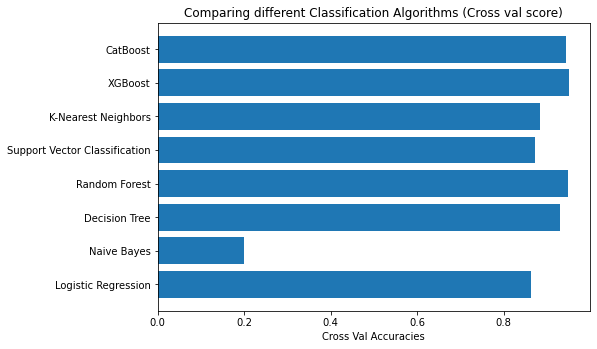

In [46]:
from sklearn.model_selection import cross_val_score

acc_lr= cross_val_score(estimator= class_ls, X= X_train, y= y_train, cv= 10)
acc_nb= cross_val_score(estimator= class_nb, X= X_train, y= y_train, cv= 10)
acc_dt= cross_val_score(estimator= class_dt, X= X_train, y= y_train, cv= 10)
acc_rf= cross_val_score(estimator= class_rf, X= X_train, y= y_train, cv= 10)
acc_knn= cross_val_score(estimator= class_knn, X= X_train, y= y_train, cv= 10)
acc_svc= cross_val_score(estimator= class_svc, X= X_train, y= y_train, cv= 10)
acc_xgb= cross_val_score(estimator= class_xgb, X= X_train, y= y_train, cv= 10)
acc_cb= cross_val_score(estimator= class_cb, X= X_train, y= y_train, cv= 10)
acc_scores= [
 acc_lr.mean(),acc_nb.mean(),acc_dt.mean(),acc_rf.mean(),acc_svc.mean(),acc_knn.mean(),
 acc_xgb.mean(),acc_cb.mean()]


fig2= plt.figure()
ax2= fig2.add_axes([0,0,1,1])
ax2.barh(algo,accuracy_scores)
ax2.set_title('Comparing different Classification Algorithms (Cross val score)')
ax2.set_xlabel('Cross Val Accuracies')

In [47]:
print(f'''
          Logistic Regression: {acc_lr.mean()*100}
          Naive Bayes: {acc_nb.mean()*100} 
          Decision Tree: {acc_dt.mean()*100} 
          Random Forest: {acc_rf.mean()*100} 
          Support Vector Classification: {acc_svc.mean()*100} 
          K-Nearest Neighbors: {acc_knn.mean()*100}
          XGBoost: {acc_xgb.mean()*100}
          CatBoost: {acc_cb.mean()*100}
          ''')


          Logistic Regression: 86.55624521954556
          Naive Bayes: 19.624208334179432 
          Decision Tree: 92.43935732642015 
          Random Forest: 94.86050662099993 
          Support Vector Classification: 87.4270268562829 
          K-Nearest Neighbors: 88.12799095690316
          XGBoost: 95.41258001268018
          CatBoost: 94.36135384726462
          


 From the above results it is clear that Gradient Boosted models will be the most accurate choice of models for this problem. The XGBoost model is superior to other models in both Execution speed and Performance, the later of the two is evident from the cross validation scores above. 